In [1]:
!pip install dataframe-image

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dataframe_image as dfi

In [3]:
df=pd.read_csv('./Fraud.csv')
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
656784,35,CASH_IN,47783.78,C262825341,541058.33,588842.11,C1150636366,57121.00,9337.22,0,0
504396,20,CASH_IN,184891.48,C2130332876,126055.22,310946.70,C1643409090,851821.85,666930.36,0,0
92560,10,CASH_OUT,51517.33,C1019235919,0.00,0.00,C2093165236,79941.00,519074.86,0,0
1013161,46,PAYMENT,6057.29,C1769414235,11523.00,5465.71,M920914233,0.00,0.00,0,0
22007,8,CASH_IN,31810.20,C2068649051,7774558.20,7806368.40,C1276319779,768391.16,233780.87,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [5]:
df.shape

(1048575, 11)

In [6]:
df['index_column'] = df.index

In [7]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,index_column
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,2


In [8]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'index_column'],
      dtype='object')

In [9]:
df.duplicated().sum() # It means no duplicates, USE df.drop_duplicates() if duplicates are there

np.int64(0)

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
index_column      0
dtype: int64

In [11]:
np.round(df.describe(),1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,index_column
count,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0,1048575.0
mean,27.0,158667.0,874009.5,893808.9,978160.0,1114198.0,0.0,0.0,524287.0
std,15.6,264940.9,2971750.6,3008271.3,2296780.4,2416593.1,0.0,0.0,302697.7
min,1.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,15.0,12149.1,0.0,0.0,0.0,0.0,0.0,0.0,262143.5
50%,20.0,76343.3,16002.0,0.0,126377.2,218260.4,0.0,0.0,524287.0
75%,39.0,213761.9,136642.0,174600.0,915923.5,1149807.5,0.0,0.0,786430.5
max,95.0,10000000.0,38900000.0,38900000.0,42100000.0,42200000.0,1.0,0.0,1048574.0


In [12]:
ct = np.round(df.describe(),1)

dfi.export(
    ct,
    "./required_images/df_describe.png",
    table_conversion="chrome",
    dpi=600       
)

In [13]:
df.corr(numeric_only=True)['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.128862
step              0.045030
index_column      0.026025
oldbalanceOrg     0.003829
newbalanceDest   -0.000495
oldbalanceDest   -0.007552
newbalanceOrig   -0.009438
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

In [14]:
for col in df.columns:
    print(col,": ",df[col].nunique())

step :  95
type :  5
amount :  1009606
nameOrig :  1048317
oldbalanceOrg :  391033
newbalanceOrig :  440792
nameDest :  449635
oldbalanceDest :  590110
newbalanceDest :  437054
isFraud :  2
isFlaggedFraud :  1
index_column :  1048575


In [15]:
# In this dataset, we can consider ztype, isFraud (target variable), isFlaggedFraud as categorical variables.

In [16]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [17]:
df.drop('isFlaggedFraud',axis=1,inplace=True)
df.shape

(1048575, 11)

In [18]:
df['isFraud'].unique()

array([0, 1])

In [19]:
df['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.89109
1     0.10891
Name: proportion, dtype: float64

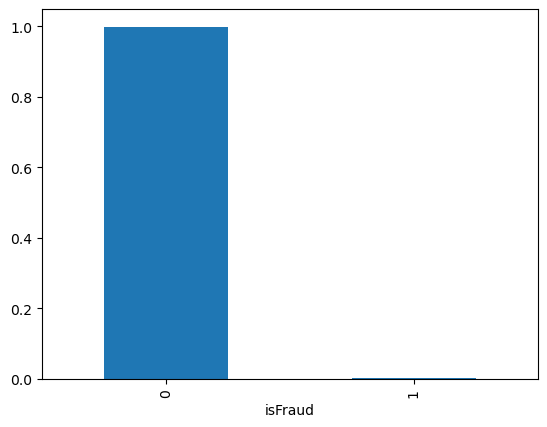

In [20]:
df['isFraud'].value_counts(normalize=True).plot(kind='bar');
plt.savefig("./required_images/fraud_percent_bar_graph.png", dpi=600, bbox_inches='tight')

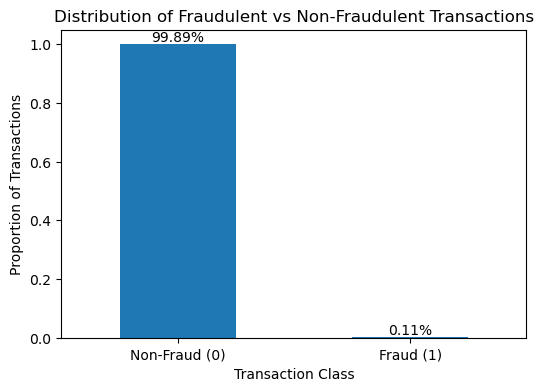

In [21]:
# Calculate normalized counts
fraud_dist = df['isFraud'].value_counts(normalize=True).sort_index()

# Create plot
plt.figure(figsize=(6, 4))
ax = fraud_dist.plot(kind='bar')

# Labels and title
ax.set_xlabel("Transaction Class")
ax.set_ylabel("Proportion of Transactions")
ax.set_title("Distribution of Fraudulent vs Non-Fraudulent Transactions")

# X-tick labels
ax.set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'], rotation=0)

# Annotate bars with percentages
for p in ax.patches:
    percentage = f"{p.get_height() * 100:.2f}%"
    ax.annotate(
        percentage,
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Improve layout
# plt.tight_layout()

# Save high-resolution figure
plt.savefig("./required_images/fraud_percent_bar_graph.png",
            dpi=600,
            bbox_inches='tight')

plt.show()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

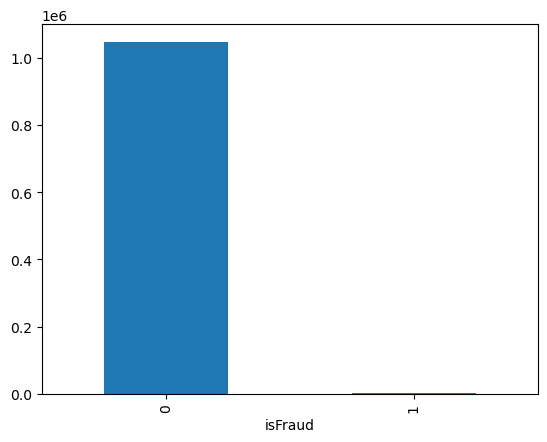

In [22]:
df['isFraud'].value_counts().plot(kind='bar')
df['isFraud'].value_counts()
# IT IS COMPLETELY A IMBALANCED DATASET, WHICH MEANS THAT WE SHOULD USE ONLY F1-Score as metric

## As it is completely an Imbalanced Dataset, which means that we have to convert Imbalanced Dataset To Balanced Dataset & Should consider only Precision, Recall, And F1-Score as the Metrics

## Feature Engineering

In [23]:
df["amount_ratio"] = df["amount"] / (df["oldbalanceOrg"] + 1)
# this may explain how suspicious a transaction is relative to the account balance

In [24]:
df["balance_diff_orig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]

df["balance_diff_dest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [25]:
df["origin_balance_error"] = (df["oldbalanceOrg"] - df["amount"] - df["newbalanceOrig"]).abs()

df["dest_balance_error"] = (df["oldbalanceDest"] + df["amount"] - df["newbalanceDest"]).abs()

In [26]:
df["is_zero_balance_after"] = (df["newbalanceOrig"] == 0).astype(int)


In [27]:
df["is_merchant_dest"] = df["nameDest"].str.startswith("M").astype(int)

df["is_merchant_orig"] = df["nameOrig"].str.startswith("M").astype(int)

In [28]:
df["orig_txn_count"] = df.groupby("nameOrig")["nameOrig"].transform("count")
# how many times each origin has transacted

In [29]:
df["dest_txn_count"] = df.groupby("nameDest")["nameDest"].transform("count")
# how many times each destination receives money

In [30]:
df["orig_avg_amount"] = df.groupby("nameOrig")["amount"].transform("mean")
df["dest_avg_amount"] = df.groupby("nameDest")["amount"].transform("mean")


In [31]:
df["amount_deviation_orig"] = df["amount"] - df["orig_avg_amount"]


In [32]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,origin_balance_error,dest_balance_error,is_zero_balance_after,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,0.0,9839.64,0,1,0,1,1,9839.64,9839.640000,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,0.0,1864.28,0,1,0,1,1,1864.28,1864.280000,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,...,0.0,181.00,1,0,0,1,26,181.00,217450.950000,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,...,0.0,21363.00,1,0,0,1,27,181.00,288750.287407,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,...,0.0,11668.14,0,1,0,1,1,11668.14,11668.140000,0.0


In [33]:
for col in df.columns:
    if df[col].nunique()<=10:
        print("Value Counts of",col,":")
        print(df[col].value_counts(),"\n\n")

Value Counts of type :
type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64 


Value Counts of isFraud :
isFraud
0    1047433
1       1142
Name: count, dtype: int64 


Value Counts of is_zero_balance_after :
is_zero_balance_after
1    580275
0    468300
Name: count, dtype: int64 


Value Counts of is_merchant_dest :
is_merchant_dest
0    694702
1    353873
Name: count, dtype: int64 


Value Counts of is_merchant_orig :
is_merchant_orig
0    1048575
Name: count, dtype: int64 


Value Counts of orig_txn_count :
orig_txn_count
1    1048059
2        516
Name: count, dtype: int64 




In [34]:
df['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

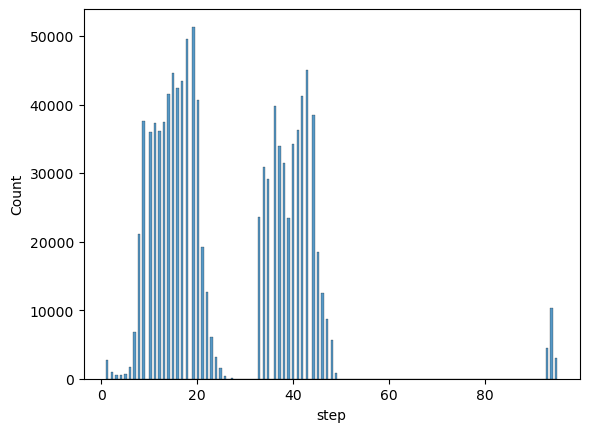

In [35]:
sns.histplot(df['step']);
plt.savefig("./required_images/step_distribution.png", dpi=600, bbox_inches='tight')

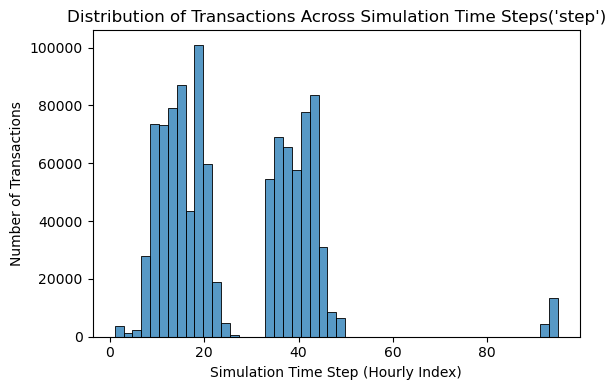

In [36]:
plt.figure(figsize=(6, 4))

sns.histplot(
    df['step'],
    bins=50,
    kde=False
)

# Labels and title
plt.xlabel("Simulation Time Step (Hourly Index)")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Transactions Across Simulation Time Steps('step')")

# Improve layout
plt.tight_layout()

# Save high-resolution figure
plt.savefig(
    "./required_images/step_distribution.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   step                   1048575 non-null  int64  
 1   type                   1048575 non-null  object 
 2   amount                 1048575 non-null  float64
 3   nameOrig               1048575 non-null  object 
 4   oldbalanceOrg          1048575 non-null  float64
 5   newbalanceOrig         1048575 non-null  float64
 6   nameDest               1048575 non-null  object 
 7   oldbalanceDest         1048575 non-null  float64
 8   newbalanceDest         1048575 non-null  float64
 9   isFraud                1048575 non-null  int64  
 10  index_column           1048575 non-null  int64  
 11  amount_ratio           1048575 non-null  float64
 12  balance_diff_orig      1048575 non-null  float64
 13  balance_diff_dest      1048575 non-null  float64
 14  origin_balance_err

In [38]:
df.drop(["type","nameOrig","nameDest"], axis=1).groupby('step').mean()['isFraud']*100
#For identifying steps which regularly do fraud transactions

step
1       0.590842
2       0.788955
3       0.724638
4       1.769912
5       0.902256
         ...    
91    100.000000
92    100.000000
93      0.360036
94      0.115696
95      0.268456
Name: isFraud, Length: 95, dtype: float64

In [39]:
#For identifying steps which regularly do fraud transactions (IN A MORE CLEAR WAY)
fraud_steps=pd.DataFrame(df.pivot_table(values='isFraud', index='step', aggfunc='mean') * 100)
fraud_steps[fraud_steps['isFraud']>30]

,isFraud
step,
28,100.0
29,100.0
30,100.0
31,100.0
32,100.0
50,100.0
51,100.0
52,100.0
53,100.0


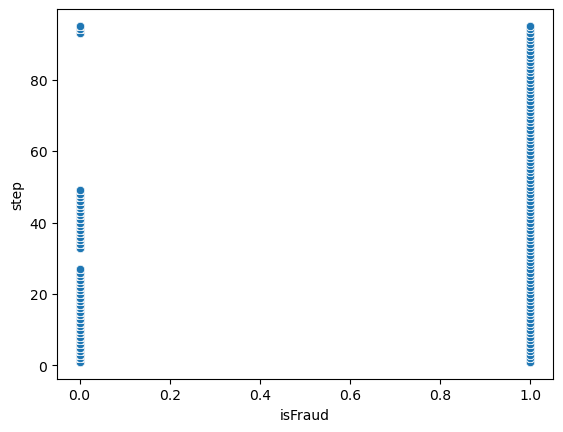

In [40]:
sns.scatterplot(y=df['step'],x=df['isFraud']);
plt.savefig("./required_images/isFraud_scatterplot.png", dpi=600, bbox_inches='tight')

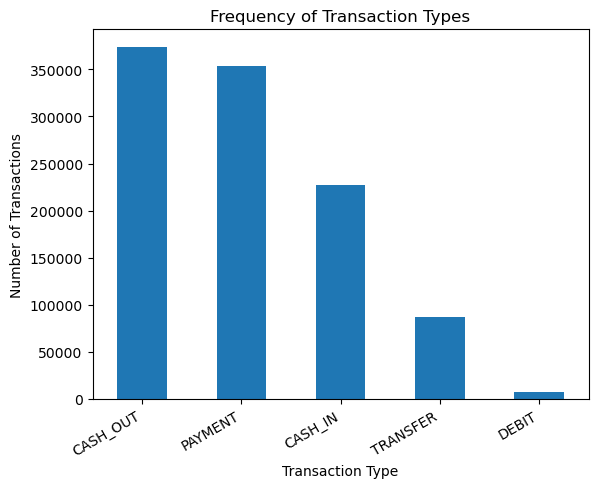

In [41]:
df['type'].value_counts().plot(kind='bar');
df['type'].value_counts()



# Labels and title
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.title("Frequency of Transaction Types")

plt.savefig("./required_images/type_valuecounts.png", dpi=600, bbox_inches='tight')

plt.xticks(rotation=30, ha='right')
plt.show()

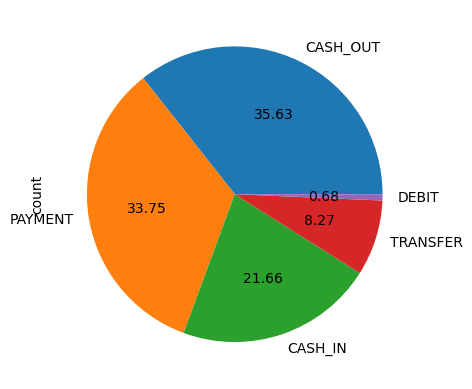

In [42]:
df['type'].value_counts().plot(kind='pie',autopct='%.2f');
df['type'].value_counts()
plt.savefig("./required_images/type_pieChart_valuecounts.png", dpi=600, bbox_inches='tight')

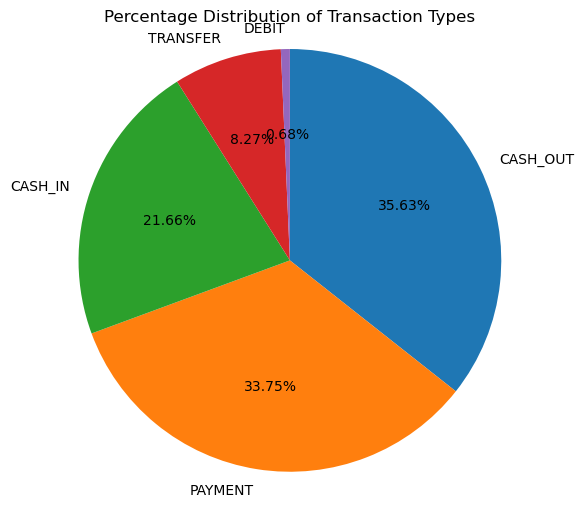

In [43]:
# Compute counts
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 6))

# Create pie chart
plt.pie(
    type_counts,
    labels=type_counts.index,
    autopct='%1.2f%%',
    startangle=90,
    counterclock=False
)

# Equal aspect ratio ensures circle shape
plt.axis('equal')

# Title
plt.title("Percentage Distribution of Transaction Types")

# Save high-resolution figure
# plt.savefig(
#     "./required_images/type_pieChart_valuecounts.png",
#     dpi=600,
#     bbox_inches='tight'
# )

plt.show()


In [44]:
df['amount'].value_counts()

amount
10000000.00    14
706.25          6
3216.80         5
5909.55         5
1711.67         5
               ..
35615.13        1
20254.60        1
28724.83        1
792.07          1
1600.07         1
Name: count, Length: 1009606, dtype: int64

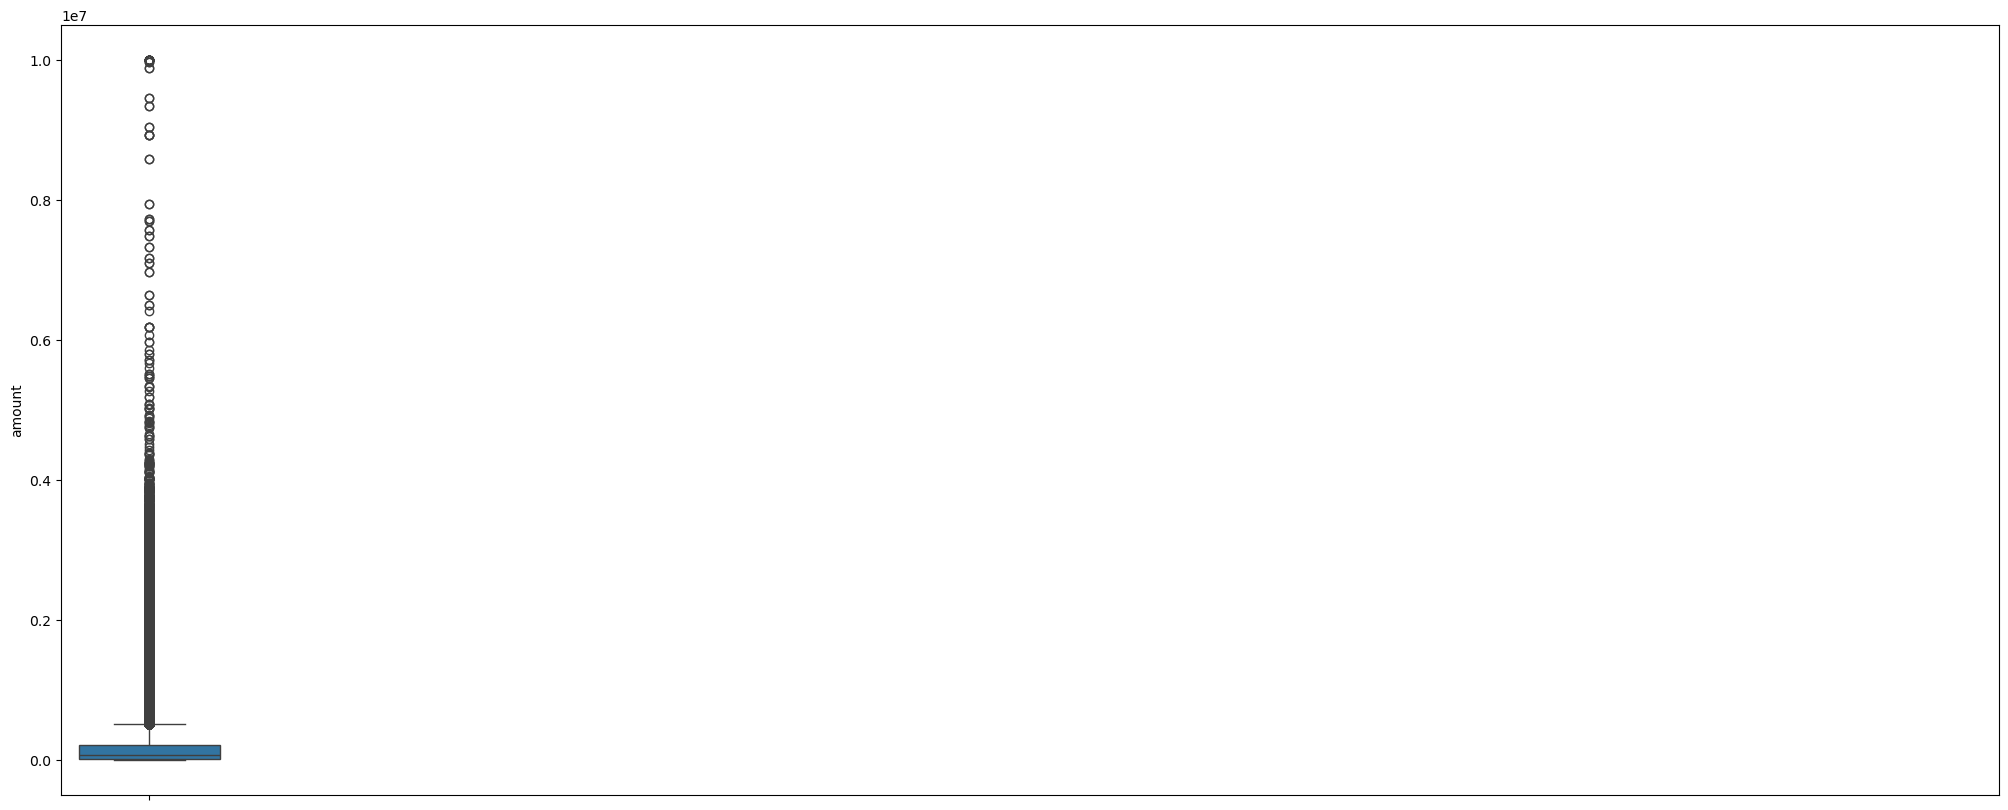

In [45]:
plt.figure(figsize=(25,10))
plt.xticks([w for w in range(0,11000000,1000000)])
sns.boxplot(df['amount']);

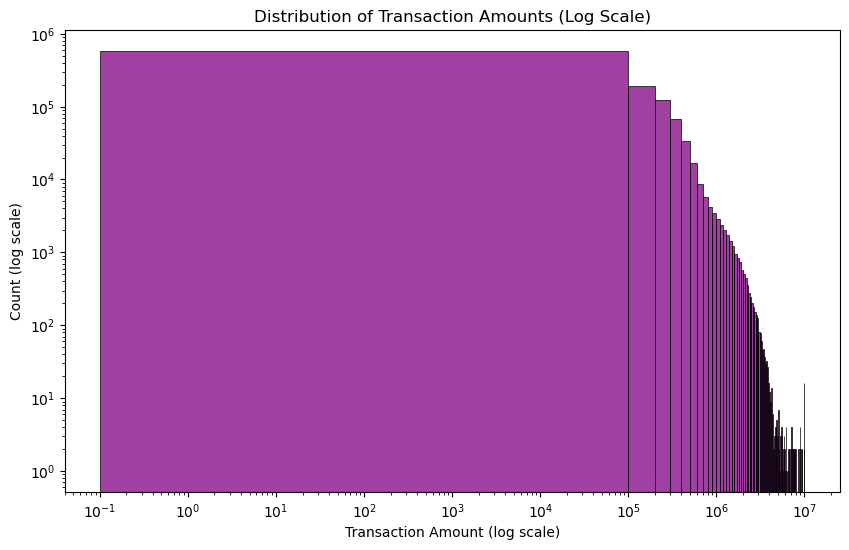

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=100, color='purple')
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of Transaction Amounts (Log Scale)')
plt.xlabel('Transaction Amount (log scale)')
plt.savefig("./required_images/amount_distribution.png", dpi=600, bbox_inches='tight')
plt.ylabel('Count (log scale)')
plt.show()

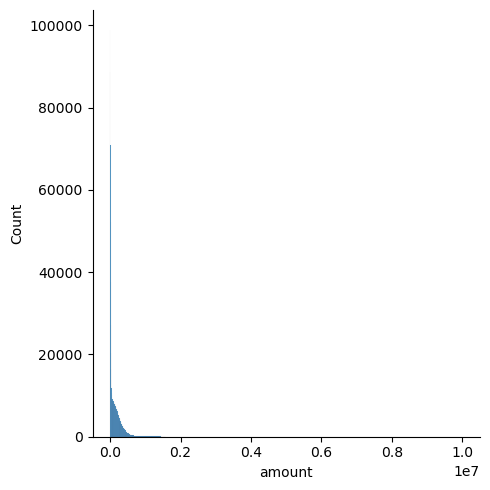

In [47]:
sns.displot(df['amount']);

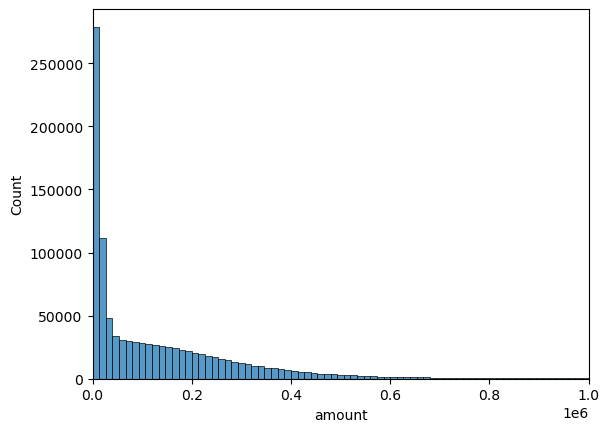

In [48]:
plt.xlim(0,1000000)
sns.histplot(df['amount'],bins=750);

In [49]:
np.round(df['amount'].describe(),2)

count     1048575.00
mean       158666.98
std        264940.93
min             0.10
25%         12149.06
50%         76343.33
75%        213761.89
max      10000000.00
Name: amount, dtype: float64

## Outlier Detection

In [50]:
# on Amount variable

# as Amount variable has completely right skewed distribution, we should IQR method to detect the outliers

# i.e. outliers are data points which are less than (Q1-1.5(IQR)) or greater than (Q3+1.5(IQR))

In [51]:
q1_amount=df['amount'].quantile(0.25)
q3_amount=df['amount'].quantile(0.75)
iqr_amount=q3_amount-q1_amount

min_amount=(q1_amount-1.5*iqr_amount)
max_amount=(q3_amount+1.5*iqr_amount)

print(min_amount,max_amount)

df[(df['amount']<min_amount) | (df['amount']>max_amount)]


-290270.17250000004 516181.12750000006


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,origin_balance_error,dest_balance_error,is_zero_balance_after,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,...,1505626.01,3.981106e+06,1,0,0,1,87,1505626.01,470216.843333,0.0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,...,554026.99,1.133313e+06,1,0,0,1,15,554026.99,204367.776000,0.0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19200000.00,0,...,761507.39,1.715846e+07,1,0,0,1,89,761507.39,457576.544045,0.0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19200000.00,0,...,1429051.47,1.572940e+07,1,0,0,1,89,1429051.47,457576.544045,0.0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,...,583848.46,8.561516e+05,1,0,0,1,96,583848.46,352305.146875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048011,95,TRANSFER,1339844.75,C1604159675,0.00,0.0,C891089759,31500000.00,32800000.00,0,...,1339844.75,3.984475e+04,1,0,0,1,24,1339844.75,331980.118750,0.0
1048027,95,TRANSFER,3572499.78,C1076671504,0.00,0.0,C1411451832,3835064.84,7407564.62,0,...,3572499.78,9.313226e-10,1,0,0,1,24,3572499.78,354812.035000,0.0
1048082,95,TRANSFER,2905341.96,C1244477950,41666.26,0.0,C1839656095,7592851.22,10500000.00,0,...,2863675.70,1.806820e+03,1,0,0,1,4,2905341.96,892994.180000,0.0
1048139,95,TRANSFER,1642975.23,C1030530719,217134.41,0.0,C1877292423,1908642.37,3551617.61,0,...,1425840.82,1.000000e-02,1,0,0,1,20,1642975.23,251764.041000,0.0


In [52]:
# So, now any data points less than min_amount or greater than max_amount are outliers

In [53]:
outliers= df[(df['amount']<min_amount) | (df['amount']>max_amount)]

outliers
# These are the outliers in amount variable

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,origin_balance_error,dest_balance_error,is_zero_balance_after,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,...,1505626.01,3.981106e+06,1,0,0,1,87,1505626.01,470216.843333,0.0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,...,554026.99,1.133313e+06,1,0,0,1,15,554026.99,204367.776000,0.0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19200000.00,0,...,761507.39,1.715846e+07,1,0,0,1,89,761507.39,457576.544045,0.0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19200000.00,0,...,1429051.47,1.572940e+07,1,0,0,1,89,1429051.47,457576.544045,0.0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,...,583848.46,8.561516e+05,1,0,0,1,96,583848.46,352305.146875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048011,95,TRANSFER,1339844.75,C1604159675,0.00,0.0,C891089759,31500000.00,32800000.00,0,...,1339844.75,3.984475e+04,1,0,0,1,24,1339844.75,331980.118750,0.0
1048027,95,TRANSFER,3572499.78,C1076671504,0.00,0.0,C1411451832,3835064.84,7407564.62,0,...,3572499.78,9.313226e-10,1,0,0,1,24,3572499.78,354812.035000,0.0
1048082,95,TRANSFER,2905341.96,C1244477950,41666.26,0.0,C1839656095,7592851.22,10500000.00,0,...,2863675.70,1.806820e+03,1,0,0,1,4,2905341.96,892994.180000,0.0
1048139,95,TRANSFER,1642975.23,C1030530719,217134.41,0.0,C1877292423,1908642.37,3551617.61,0,...,1425840.82,1.000000e-02,1,0,0,1,20,1642975.23,251764.041000,0.0


In [54]:
outliers['isFraud'].value_counts()

isFraud
0    52625
1      463
Name: count, dtype: int64

In [55]:
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_df = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers_df, lower_bound, upper_bound


In [56]:
outliers, min_amount, max_amount = detect_outliers_iqr(df, 'amount')

print(f"Outliers found: {len(outliers)}")
print(f"Lower Bound: {min_amount}")
print(f"Upper Bound: {max_amount}")


Outliers found: 53088
Lower Bound: -290270.17250000004
Upper Bound: 516181.12750000006


In [57]:
outliers['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.127863
1     0.872137
Name: proportion, dtype: float64

In [58]:
outliers, min_amount, max_amount = detect_outliers_iqr(df, 'oldbalanceOrg')

print(f"Outliers found: {len(outliers)}")
print(f"Lower Bound: {min_amount}")
print(f"Upper Bound: {max_amount}")


Outliers found: 181877
Lower Bound: -204963.03000000003
Upper Bound: 341605.05000000005


In [59]:
from sklearn.neighbors import LocalOutlierFactor

def detect_lof_outliers_full(df, column='amount', n_neighbors=20, contamination=0.01):

    # Drop missing values from the target column
    df_clean = df[[column]].dropna().copy()

    # Fit LOF on full column
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    y_pred = lof.fit_predict(df_clean[[column]])
    lof_scores = lof.negative_outlier_factor_

    # Add results to the original DataFrame
    df.loc[df_clean.index, 'lof_score'] = lof_scores
    df.loc[df_clean.index, 'is_lof_outlier'] = (y_pred == -1)

    return df

In [60]:
# LOF on 'amount'

outliers_df = detect_lof_outliers_full(df, column='amount')
outliers = outliers_df[outliers_df['is_lof_outlier'] == True]
outliers

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,is_zero_balance_after,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig,lof_score,is_lof_outlier
230,1,CASH_OUT,71532.24,C2082351661,2101.19,0.00,C1810132623,74956.00,97128.19,0,...,1,0,0,1,28,71532.24,194378.246071,0.0,-1.207250,True
394,1,CASH_IN,193492.68,C1200546947,706457.23,899949.91,C1531333864,1247284.13,55974.56,0,...,0,0,0,1,55,193492.68,318812.333273,0.0,-1.215621,True
456,1,CASH_IN,110226.34,C1475192960,1601450.63,1601450.63,C1816757085,1601450.63,10700000.00,0,...,0,0,0,1,69,110226.34,374803.453913,0.0,-1.238826,True
506,1,PAYMENT,3605.26,C226690498,10120.00,6514.74,M1455204443,0.00,0.00,0,...,0,1,0,1,1,3605.26,3605.260000,0.0,-1.222743,True
789,1,TRANSFER,32132.45,C2116299597,62491.91,30359.46,C1466073198,59605.00,0.00,0,...,0,0,0,1,15,32132.45,520522.256000,0.0,-1.243979,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048162,95,PAYMENT,6434.71,C1715412905,124.00,0.00,M1009217854,0.00,0.00,0,...,1,1,0,1,1,6434.71,6434.710000,0.0,-1.211943,True
1048264,95,PAYMENT,10965.00,C1399805259,0.00,0.00,M1446031898,0.00,0.00,0,...,1,1,0,1,1,10965.00,10965.000000,0.0,-1.200742,True
1048349,95,PAYMENT,9657.20,C1061200991,29576.50,19919.30,M1190509029,0.00,0.00,0,...,0,1,0,1,1,9657.20,9657.200000,0.0,-1.232447,True
1048423,95,PAYMENT,1721.76,C1243461125,151731.00,150009.24,M1979523519,0.00,0.00,0,...,0,1,0,1,1,1721.76,1721.760000,0.0,-1.266799,True


In [61]:
outliers['isFraud'].value_counts()

isFraud
0    10476
1       10
Name: count, dtype: int64

In [62]:
outliers['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.904635
1     0.095365
Name: proportion, dtype: float64

In [63]:
# # LOF on isFraud

# outliers_df = detect_lof_outliers_full(df, column='isFraud')
# outliers = outliers_df[outliers_df['is_lof_outlier'] == True]
# outliers

<Axes: ylabel='oldbalanceOrg'>

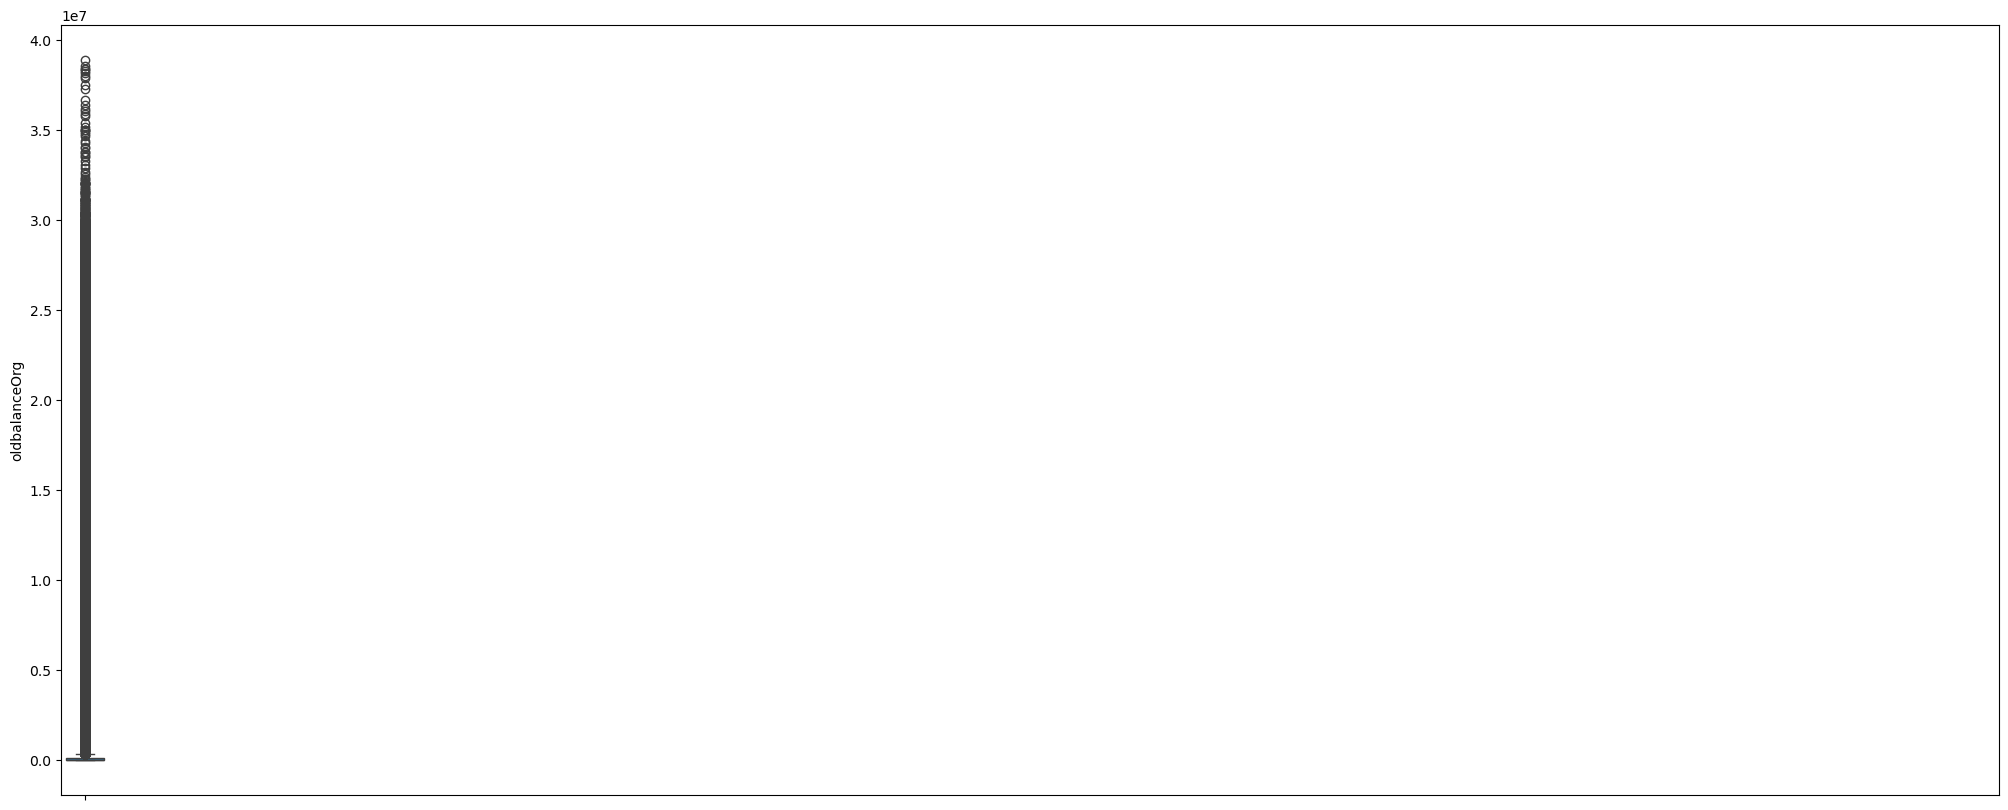

In [64]:
plt.figure(figsize=(25,10))
plt.xticks([w for w in range(0,41000000,1000000)])
sns.boxplot(df['oldbalanceOrg'])

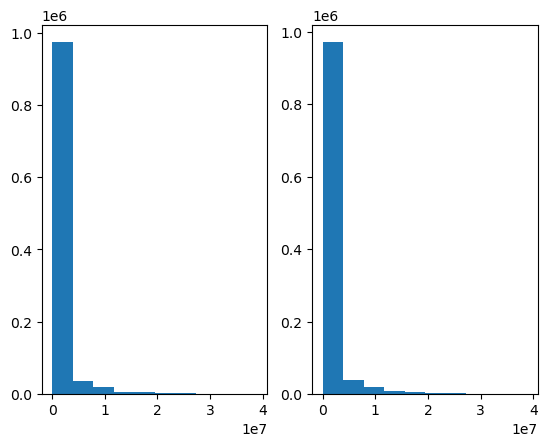

In [65]:
plt.subplot(1,2,1)
plt.hist(df['oldbalanceOrg'])

plt.subplot(1,2,2)
plt.hist(df['newbalanceOrig'])

plt.show()

In [66]:
df['nameDest'].nunique()

449635

In [67]:
df['oldbalanceDest'].nunique()

590110

In [68]:
np.round(df['oldbalanceDest'].describe(),2)

count     1048575.00
mean       978160.05
std       2296780.39
min             0.00
25%             0.00
50%        126377.21
75%        915923.48
max      42100000.00
Name: oldbalanceDest, dtype: float64

In [69]:
df['newbalanceDest'].nunique()

437054

In [70]:
np.round(df.oldbalanceDest.describe(),2)

count     1048575.00
mean       978160.05
std       2296780.39
min             0.00
25%             0.00
50%        126377.21
75%        915923.48
max      42100000.00
Name: oldbalanceDest, dtype: float64

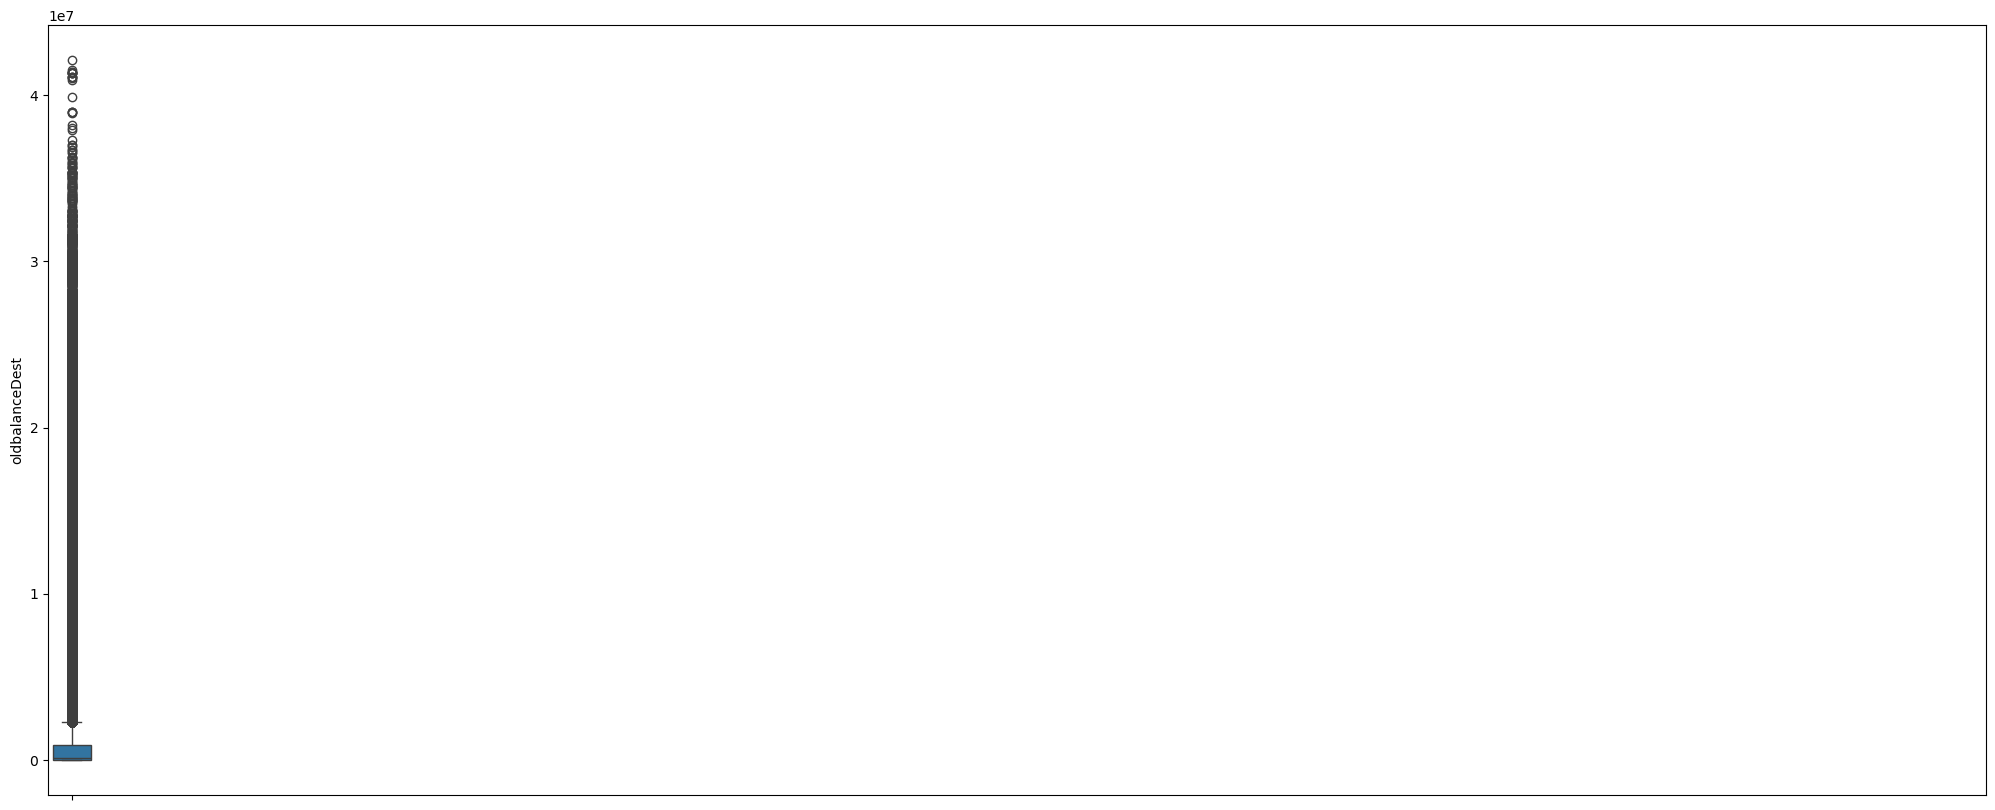

In [71]:
plt.figure(figsize=(25,10))
plt.xticks([w for w in range(0,41000000,1000000)])
sns.boxplot(df['oldbalanceDest']);

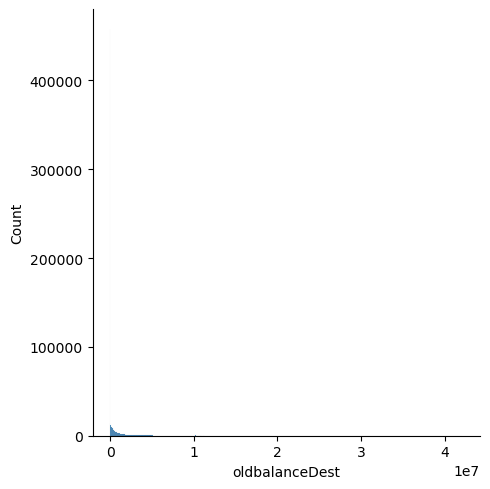

In [72]:
sns.displot(df['oldbalanceDest']);

## BIVARIATE OR MULTI VARIATE ANALYSIS


### => EDA(Exploration Data Analysis using multi variables)

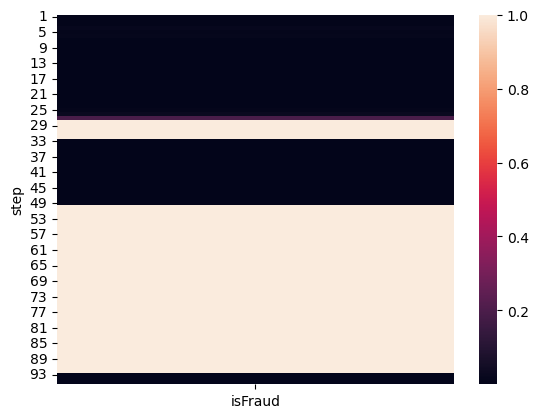

In [73]:
sns.heatmap(df.pivot_table(values='isFraud',index='step'));
plt.savefig("./required_images/step_isFraud_heatmap.png", dpi=600, bbox_inches='tight')

# Interpretations:
# We can observe from this heatmap that fraud transations occur at only certain steps, particularly steps 25–29 & mostly from steps step 53 to step 90
# -> This that the fraudsters may operate in bursts or sessions, rather than at random times.
# Fraud events are extremely rare and occur only during specific time intervals

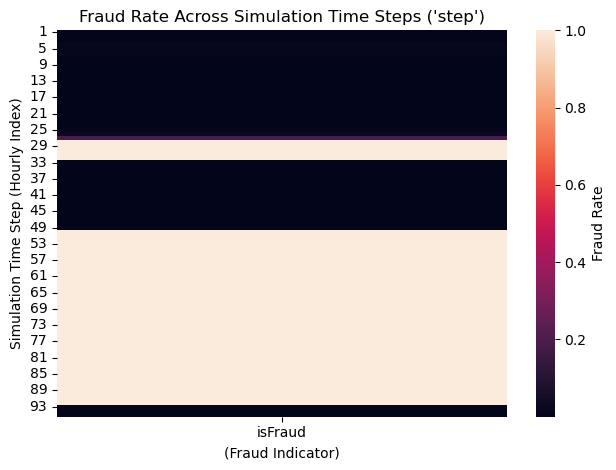

In [74]:
# Create pivot table: mean fraud rate per time step
heatmap_data = df.pivot_table(
    values='isFraud',
    index='step',
    aggfunc='mean'
)

# plt.figure(figsize=(4, 6))

sns.heatmap(
    heatmap_data,
    # cmap='Reds',
    cbar_kws={'label': 'Fraud Rate'},
    linewidths=0
)

# Labels and title
plt.xlabel("(Fraud Indicator)")
plt.ylabel("Simulation Time Step (Hourly Index)")
plt.title("Fraud Rate Across Simulation Time Steps ('step')")

# Improve layout
plt.tight_layout()

# # Save high-resolution figure
plt.savefig(
    "./required_images/step_isFraud_heatmap.png",
    dpi=600,
    bbox_inches='tight'
)

plt.show()


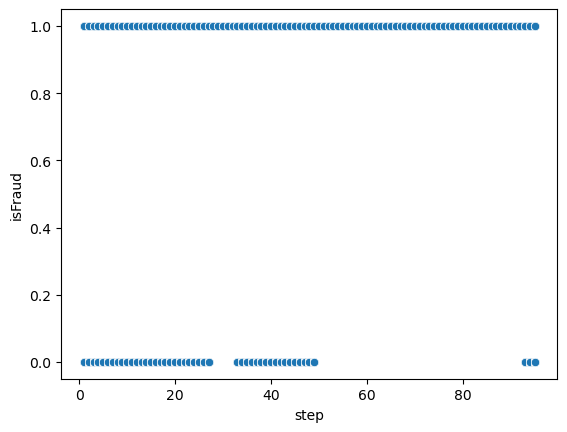

In [75]:
sns.scatterplot(x=df['step'],y=df['isFraud']);

In [76]:
# sns.pairplot(df,hue='isFraud');

In [77]:
# sns.pairplot(df);

In [78]:
pd.crosstab(df['type'],df['isFraud'])

# We can see that the Fraud transactions occur only in 2 type of transactions i.e. "CASH_OUT" & "TRANSFER"
# -> This indicates that Fraudsters typically withdraw money (CASH_OUT) (or) move money between accounts (TRANSFER)
# We can consider 'CASH_OUT' & 'TRANSFER' as High Risk Transaction Types.

isFraud,0,1
type,,
CASH_IN,227130,0
CASH_OUT,373063,578
DEBIT,7178,0
PAYMENT,353873,0
TRANSFER,86189,564


In [79]:

ct = pd.crosstab(df['type'], df['isFraud'])
dfi.export(
    ct,
    "./required_images/2_type_isFraud_crosstab.png",
    table_conversion="chrome",
    dpi=600
)

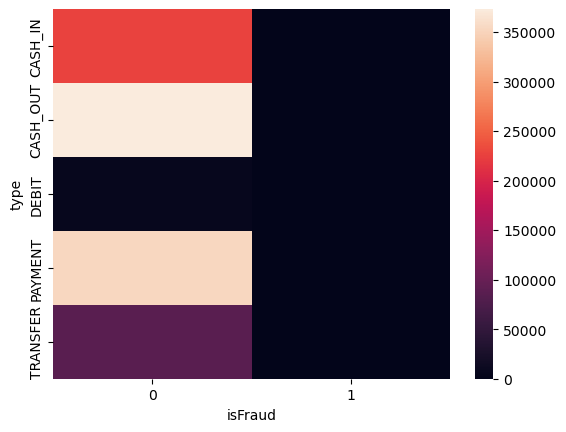

In [80]:
sns.heatmap(pd.crosstab(df['type'],df['isFraud']));

In [81]:
round(df.groupby('type')['isFraud'].mean()*100,2)

type
CASH_IN     0.00
CASH_OUT    0.15
DEBIT       0.00
PAYMENT     0.00
TRANSFER    0.65
Name: isFraud, dtype: float64

In [82]:
s = round(df.groupby('type')['isFraud'].mean()*100,2)

fig, ax = plt.subplots(figsize=(1, 1))

# turn off axes
ax.axis('off')

# create a table from the series
table = ax.table(
    cellText=[[f"{v:.2f}"] for v in s.values],
    rowLabels=s.index,
    colLabels=[s.name],
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1)

plt.savefig("./required_images/percent_type_isFraud_crosstab.png", dpi=600, bbox_inches='tight')
plt.close()

C:\Users\HOME\AppData\Local\Temp\ipykernel_2692\1909077173.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


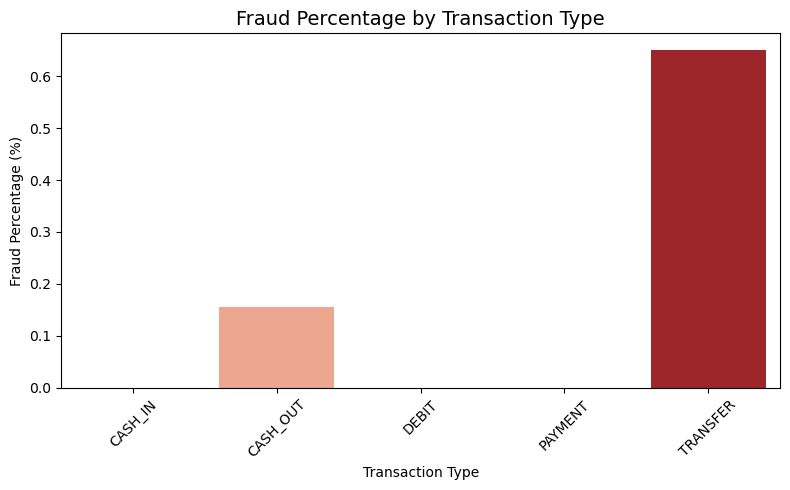

In [83]:
fraud_percent = df.groupby('type')['isFraud'].mean() * 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    x=fraud_percent.index,
    y=fraud_percent.values,
    palette="Reds"
)

plt.title("Fraud Percentage by Transaction Type", fontsize=14)
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Percentage (%)")
plt.savefig("./required_images/percent_type_isFraud_bargraph.png", dpi=600, bbox_inches='tight')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Interpretations:

# Fraud is entirely concentrated in TRANSFER and CASH_OUT transactions.
# TRANSFER shows the highest fraud percentage, followed by CASH_OUT.
# All other transaction types (CASH_IN, PAYMENT, DEBIT) have 0% fraud.
# This suggests that fraudsters mainly exploit channels where money can be quickly moved or withdrawn.

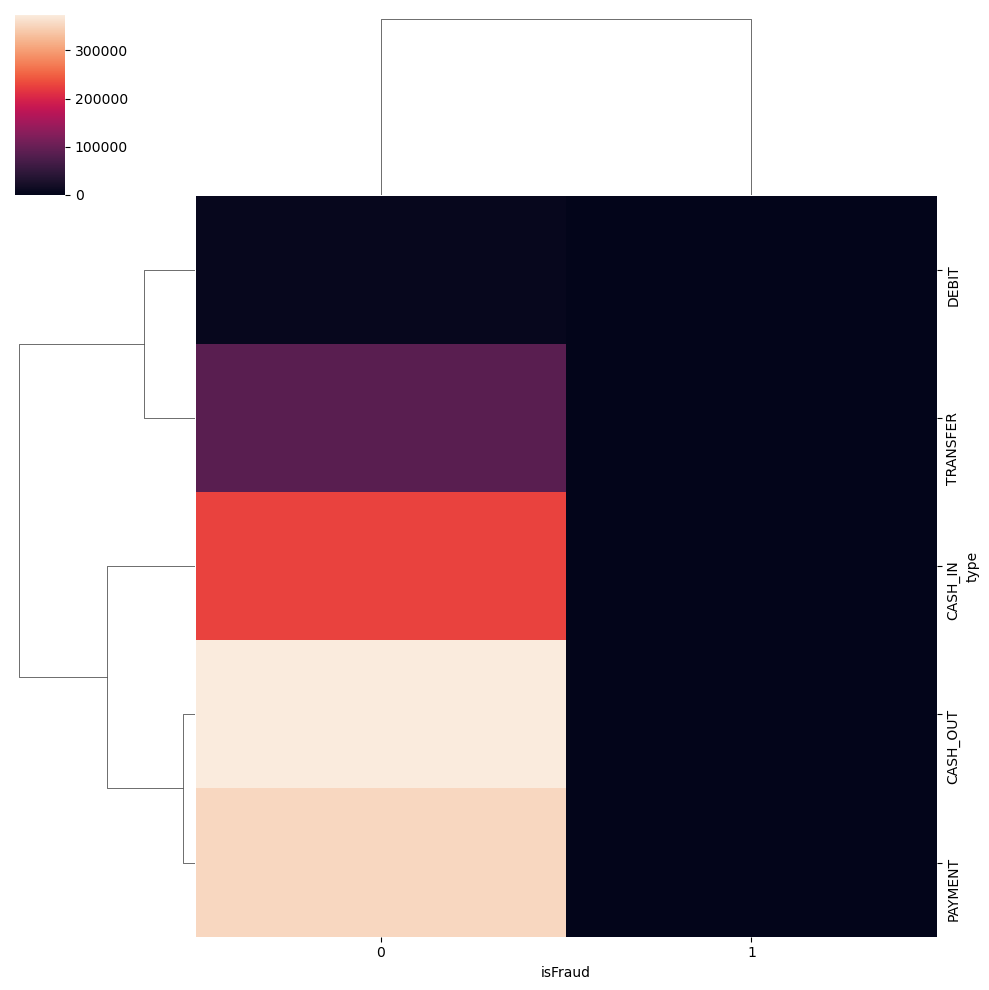

In [84]:
sns.clustermap(pd.crosstab(df['type'],df['isFraud']));

In [85]:
df['cat_nameDest']=df['nameDest'].str[0]
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig,lof_score,is_lof_outlier,cat_nameDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,...,1,0,1,1,9839.64,9839.64,0.0,-1.031775,False,M
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,...,1,0,1,1,1864.28,1864.28,0.0,-0.994466,False,M


In [86]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'index_column', 'amount_ratio', 'balance_diff_orig',
       'balance_diff_dest', 'origin_balance_error', 'dest_balance_error',
       'is_zero_balance_after', 'is_merchant_dest', 'is_merchant_orig',
       'orig_txn_count', 'dest_txn_count', 'orig_avg_amount',
       'dest_avg_amount', 'amount_deviation_orig', 'lof_score',
       'is_lof_outlier', 'cat_nameDest'],
      dtype='object')

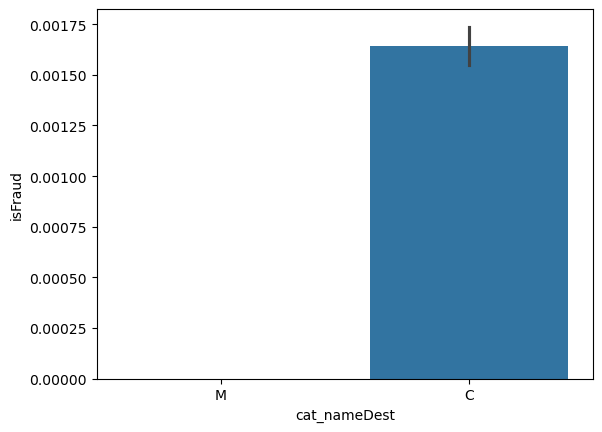

In [87]:
sns.barplot(x=df['cat_nameDest'],y=df['isFraud'])
plt.show()

In [88]:
cross_tab = pd.crosstab(df['cat_nameDest'], df['isFraud'])

print("Cross-tabulation of 'cat_nameDest' and 'isFraud':")
cross_tab

# This cross tab shows that Fraudsters never send money TO merchants. Fraud targets customer accounts.

Cross-tabulation of 'cat_nameDest' and 'isFraud':


isFraud,0,1
cat_nameDest,,
C,693560,1142
M,353873,0


In [89]:
ct = pd.crosstab(df['cat_nameDest'], df['isFraud'])
dfi.export(
    ct,
    "./required_images/cat_nameDest_isFraud_crosstab.png",
    table_conversion="chrome",
    dpi=600
)

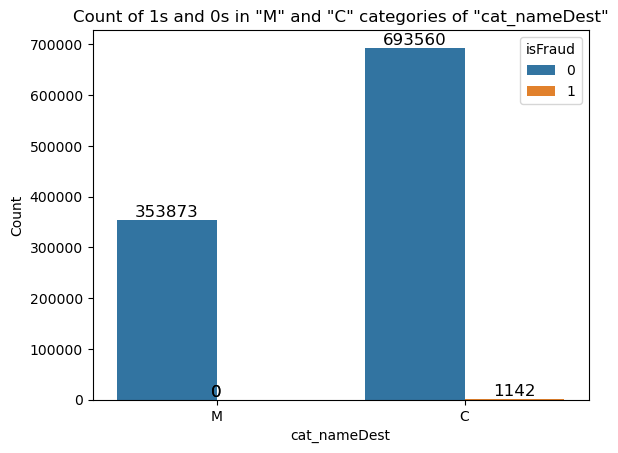

In [90]:
df.dropna(subset=['cat_nameDest', 'isFraud'], inplace=True)

sns.barplot(x='cat_nameDest', y='isFraud', data=df, hue='isFraud', estimator=lambda x: len(x))

plt.xlabel('cat_nameDest')
plt.savefig("./required_images/cat_nameDest_isFraud_bargraph.png", dpi=600, bbox_inches='tight')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in "M" and "C" categories of "cat_nameDest"')

ax=plt.gca()
for p in ax.patches:
    height=p.get_height()
    if not np.isnan(height):  # Check if the height is not NaN
        ax.text(p.get_x() + p.get_width()/2., height, '%d' % int(height),
                fontsize=12, color='black', ha='center', va='bottom')

plt.show()

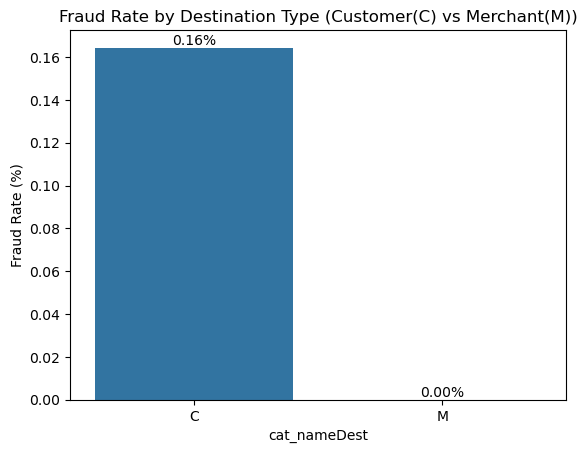

In [91]:
fraud_rate = df.groupby('cat_nameDest')['isFraud'].mean() * 100

sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate by Destination Type (Customer(C) vs Merchant(M))")

for i, v in enumerate(fraud_rate.values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')
plt.savefig("./required_images/fraudrate_by_destinationtype_bargraph.png", dpi=600, bbox_inches='tight')

plt.show()


# Interpretations:

# Fraud is heavily concentrated in transfers to customer accounts (C). Merchant accounts (M) never receive fraudulent transactions in this dataset.
# This makes cat_nameDest a strong signal for fraud detection.
# Fraud rate for customer accounts is approximately 0.16%, while fraud rate for merchant accounts is 0%.

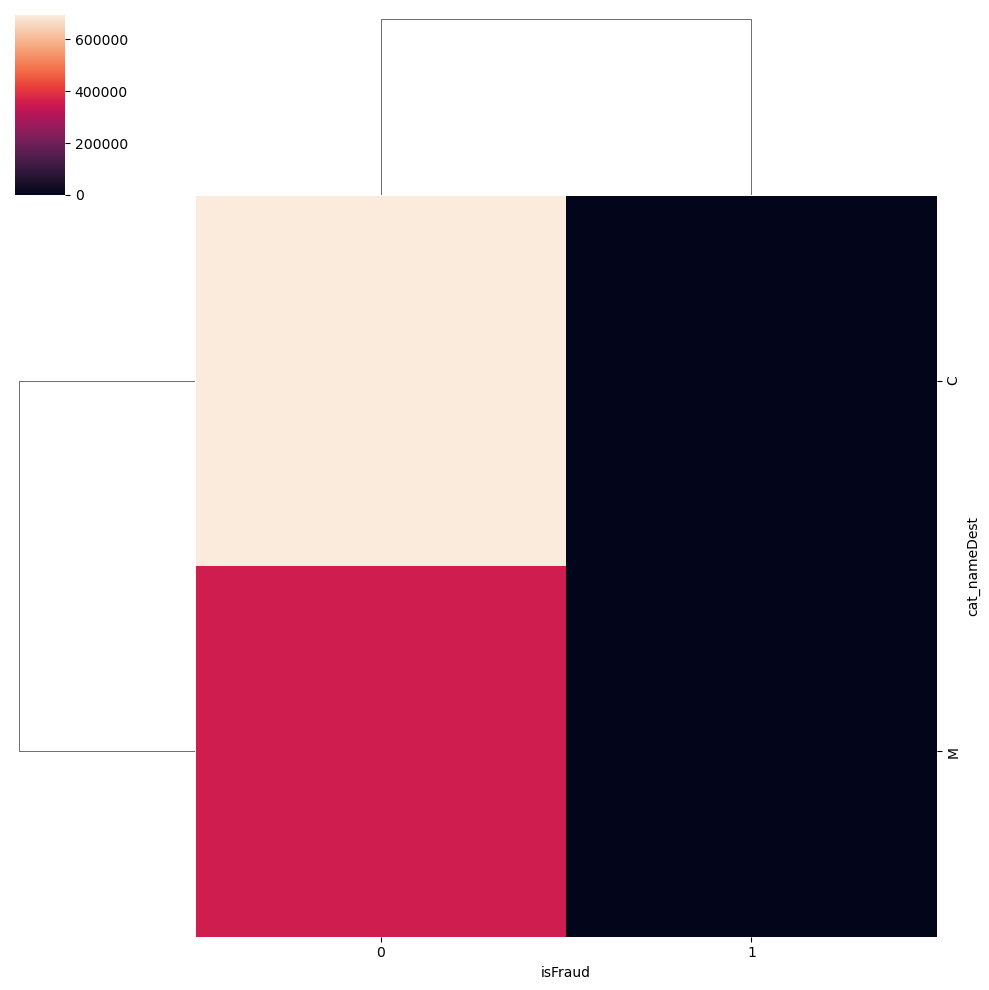

In [92]:
sns.clustermap(pd.crosstab(df['cat_nameDest'],df['isFraud']))

In [93]:
fraudulent_cases=df[df['isFraud'] == 1]
fraudulent_cases[fraudulent_cases['cat_nameDest']=='C']

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig,lof_score,is_lof_outlier,cat_nameDest
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,...,0,0,1,26,181.00,217450.950000,0.0,-1.055933,False,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,...,0,0,1,27,181.00,288750.287407,0.0,-1.055933,False,C
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,...,0,0,1,13,2806.00,288906.088462,0.0,-1.041129,False,C
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,...,0,0,1,17,2806.00,158496.538824,0.0,-1.041129,False,C
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,...,0,0,1,18,20128.00,152407.553333,0.0,-0.963943,False,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,...,0,0,1,2,56745.14,34283.790000,0.0,-0.975297,False,C
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,...,0,0,1,1,33676.59,33676.590000,0.0,-1.005052,False,C
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,...,0,0,1,1,33676.59,33676.590000,0.0,-1.005052,False,C
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1,...,0,0,1,1,87999.25,87999.250000,0.0,-1.028426,False,C


In [94]:
round(df.describe(),2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,index_column,amount_ratio,balance_diff_orig,...,dest_balance_error,is_zero_balance_after,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig,lof_score
count,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,...,1048575.00,1048575.00,1048575.00,1048575.0,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,26.97,158666.98,874009.54,893808.90,978160.05,1114197.97,0.00,524287.00,55863.88,-19799.35,...,134061.18,0.55,0.34,0.0,1.00,10.14,158666.98,158666.98,-0.00,-1.02
std,15.62,264940.93,2971750.56,3008271.33,2296780.39,2416593.12,0.03,302697.67,183311.45,135523.46,...,411988.17,0.50,0.47,0.0,0.02,10.81,264920.98,147150.12,3251.04,0.05
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1800000.00,...,0.00,0.00,0.00,0.0,1.00,1.00,0.10,0.10,-738346.50,-2.02
25%,15.00,12149.06,0.00,0.00,0.00,0.00,0.00,262143.50,0.18,0.00,...,0.01,0.00,0.00,0.0,1.00,1.00,12152.94,14757.63,0.00,-1.04
50%,20.00,76343.33,16002.00,0.00,126377.21,218260.36,0.00,524287.00,5.61,0.00,...,10537.65,1.00,0.00,0.0,1.00,7.00,76368.23,161735.76,0.00,-1.01
75%,39.00,213761.89,136642.02,174599.99,915923.48,1149807.51,0.00,786430.50,10947.43,10209.00,...,140622.38,1.00,1.00,0.0,1.00,16.00,213751.22,245964.69,0.00,-0.99
max,95.00,10000000.00,38900000.00,38900000.00,42100000.00,42200000.00,1.00,1048574.00,5860862.89,10038991.68,...,35095923.44,1.00,1.00,0.0,2.00,98.00,10000000.00,10000000.00,738346.50,-0.90


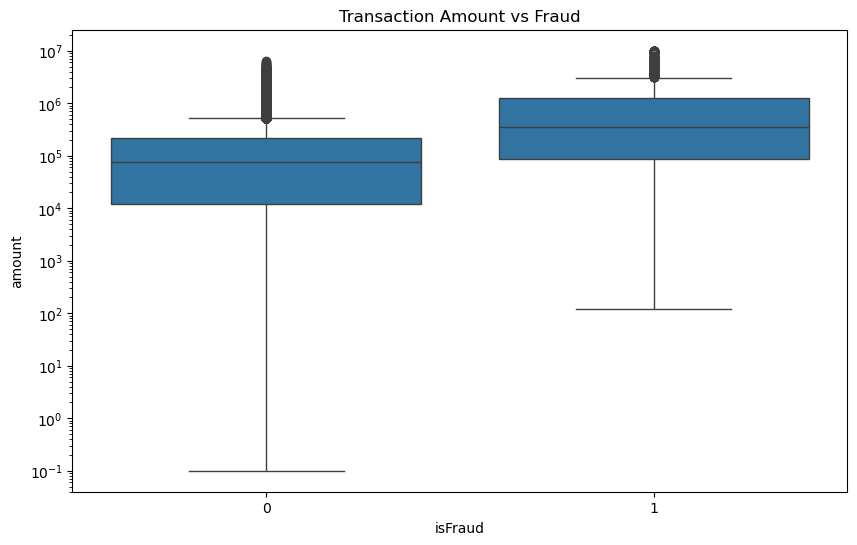

In [95]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['isFraud'], y=df['amount'])
plt.title("Transaction Amount vs Fraud")
plt.savefig("./required_images/amount_isFraud_boxplot.png", dpi=600, bbox_inches='tight')
plt.yscale('log')  # Helps with extreme values
plt.show()

# What the plot shows

# Fraud transactions (isFraud = 1) consistently involve higher transaction amounts.

# The median amount for fraud is far higher than non-fraud.

# The upper whisker and outliers show that fraudsters often use very large amounts, even into the millions.

# Key Insights

# Fraudulent transactions tend to be high-value.
# The distribution for fraud is shifted upward compared to normal transactions.
# Fraudsters often attempt to move large sums quickly, consistent with real-world fraud behavior (e.g., cash-out schemes).

# Modeling Implication

# amount is a highly predictive feature.

# But because of extreme skewness, models benefit from log(amount) transformation or scaling.

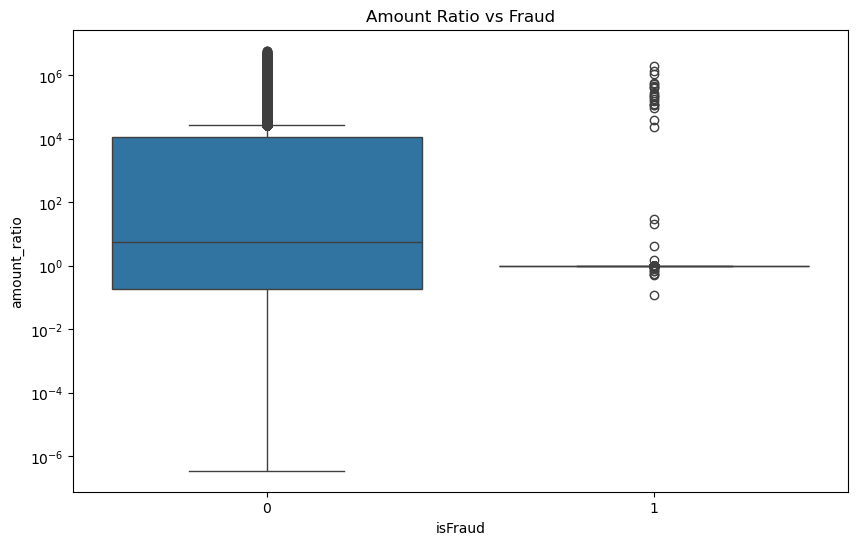

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['isFraud'], y=df['amount_ratio'])
plt.title("Amount Ratio vs Fraud")
plt.yscale('log')  # Helps with extreme values
plt.savefig("./required_images/amount_ratio_isFraud_boxplot.png", dpi=600, bbox_inches='tight')
plt.show()


# (amount_ratio = amount / (oldbalanceOrg + 1))

# What the plot shows

# Normal transactions (isFraud = 0) have a wide range of amount ratios—from extremely small to extremely large.

# Fraud transactions (isFraud = 1) show:

# Most values clustered around 1.0, meaning the fraud amount ≈ the entire account balance.

# Some high outliers where the amount exceeds typical balance behavior (common in synthetic fraud scenarios).

# Key Insights

# Fraud transactions frequently empty the account → amount_ratio ≈ 1
# Normal transactions show more variation (people don’t always send their full balance).
# In fraud cases, the attacker wants to move all available money.

# Modeling Implication

# amount_ratio is one of the strongest engineered predictors.

# It reveals a behavioral signature of fraud: draining the account.

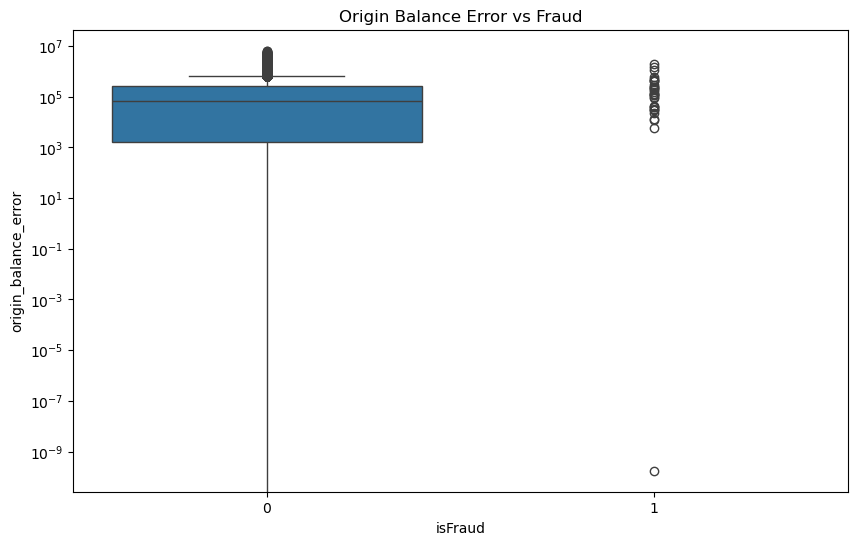

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['isFraud'], y=df['origin_balance_error'])
plt.title("Origin Balance Error vs Fraud")
plt.yscale('log')
plt.savefig("./required_images/origin_balance_error_isFraud_boxplot.png", dpi=600, bbox_inches='tight')
plt.show()


# (origin_balance_error = inconsistency between old balance, new balance, and amount)

# What the plot shows

# Fraud cases (isFraud = 1) have:

# Extremely high balance errors (large positive values)

# In some cases, near-zero anomalies (tiny float errors from calculations)

# Non-fraud cases have:

# A tighter distribution

# Lower errors, meaning balances reconcile normally

# Key Insights

# Fraud transactions create balance anomalies where expected balance ≠ actual balance.
# These errors occur because fraudulent transfers often bypass normal accounting constraints.
# Fraud accounts frequently behave abnormally in terms of balance updates.

# Modeling Implication

# origin_balance_error is a top fraud indicator.

# Models like Random Forest, XGBoost, or Gradient Boosting will rank this feature highly.

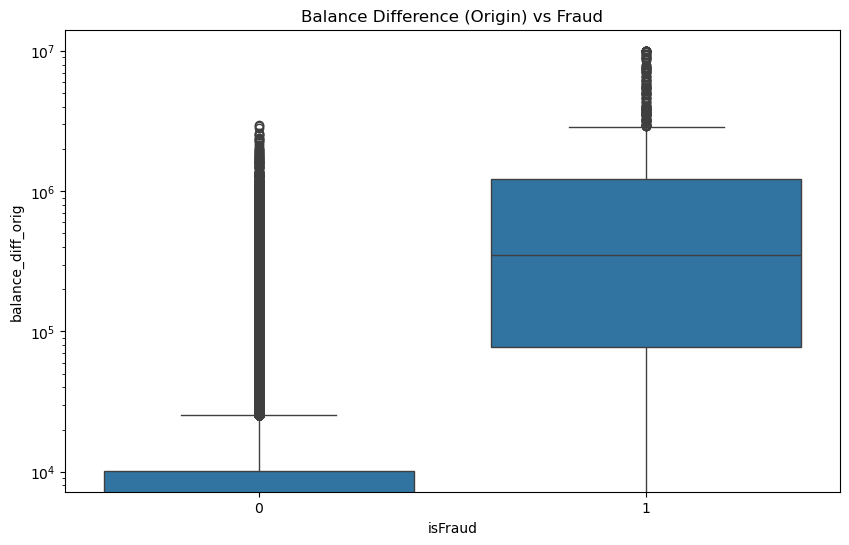

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['isFraud'], y=df['balance_diff_orig'])
plt.yscale('log')
plt.title("Balance Difference (Origin) vs Fraud")
plt.savefig("./required_images/balance_diff_orig_isFraud_boxplot.png", dpi=600, bbox_inches='tight')
plt.show()

# 1. Non-Fraud Transactions (isFraud = 0)
# Observed Pattern

# The box is very low on the y-axis, centered around 10,000 – 20,000.

# The distribution is tightly packed, meaning:

# Most legitimate transactions have small balance discrepancies.

# Outliers extend upward, but remain significantly below fraudulent ranges.

# Interpretation

# Non-fraudulent transactions follow normal accounting behavior.
# The difference between old balance, amount, and new balance is usually minimal.
# Minor discrepancies can occur due to:

# Transaction timing

# Rounding

# Account updates

# But overall, legitimate transactions maintain consistent financial logic.

# 2. Fraud Transactions (isFraud = 1)
# Observed Pattern

# The median is much higher (around 200,000–300,000).

# The IQR (box height) is very wide, indicating high variability in fraudulent behavior.

# Upper values stretch into the millions, with many extreme outliers.

# Interpretation

# Fraudulent transactions often create significant inconsistencies in account balances.
# These inconsistencies occur because fraudulent actions tend to:

# Drain accounts completely

# Manipulate new balances

# Skip proper verification steps

# Mismatch expected vs actual ledger values

# In other words, fraud breaks normal balance reconciliation.

In [99]:
df.drop(['nameDest','nameOrig'],axis=1,inplace=True)

In [100]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'index_column',
       'amount_ratio', 'balance_diff_orig', 'balance_diff_dest',
       'origin_balance_error', 'dest_balance_error', 'is_zero_balance_after',
       'is_merchant_dest', 'is_merchant_orig', 'orig_txn_count',
       'dest_txn_count', 'orig_avg_amount', 'dest_avg_amount',
       'amount_deviation_orig', 'lof_score', 'is_lof_outlier', 'cat_nameDest'],
      dtype='object')

In [101]:
df.sample()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,index_column,amount_ratio,...,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig,lof_score,is_lof_outlier,cat_nameDest
223496,14,CASH_IN,41547.27,8085.0,49632.27,0.0,222826.23,0,223496,5.138173,...,0,0,1,18,41547.27,264613.888889,0.0,-1.034405,False,C


In [102]:
df.iloc[:2,:15]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,index_column,amount_ratio,balance_diff_orig,balance_diff_dest,origin_balance_error,dest_balance_error,is_zero_balance_after
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.057834,9839.64,0.0,0.0,9839.64,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1,0.087731,1864.28,0.0,0.0,1864.28,0


In [103]:
df.iloc[:2,14:]

,is_zero_balance_after,is_merchant_dest,is_merchant_orig,orig_txn_count,dest_txn_count,orig_avg_amount,dest_avg_amount,amount_deviation_orig,lof_score,is_lof_outlier,cat_nameDest
0,0,1,0,1,1,9839.64,9839.64,0.0,-1.031775,False,M
1,0,1,0,1,1,1864.28,1864.28,0.0,-0.994466,False,M


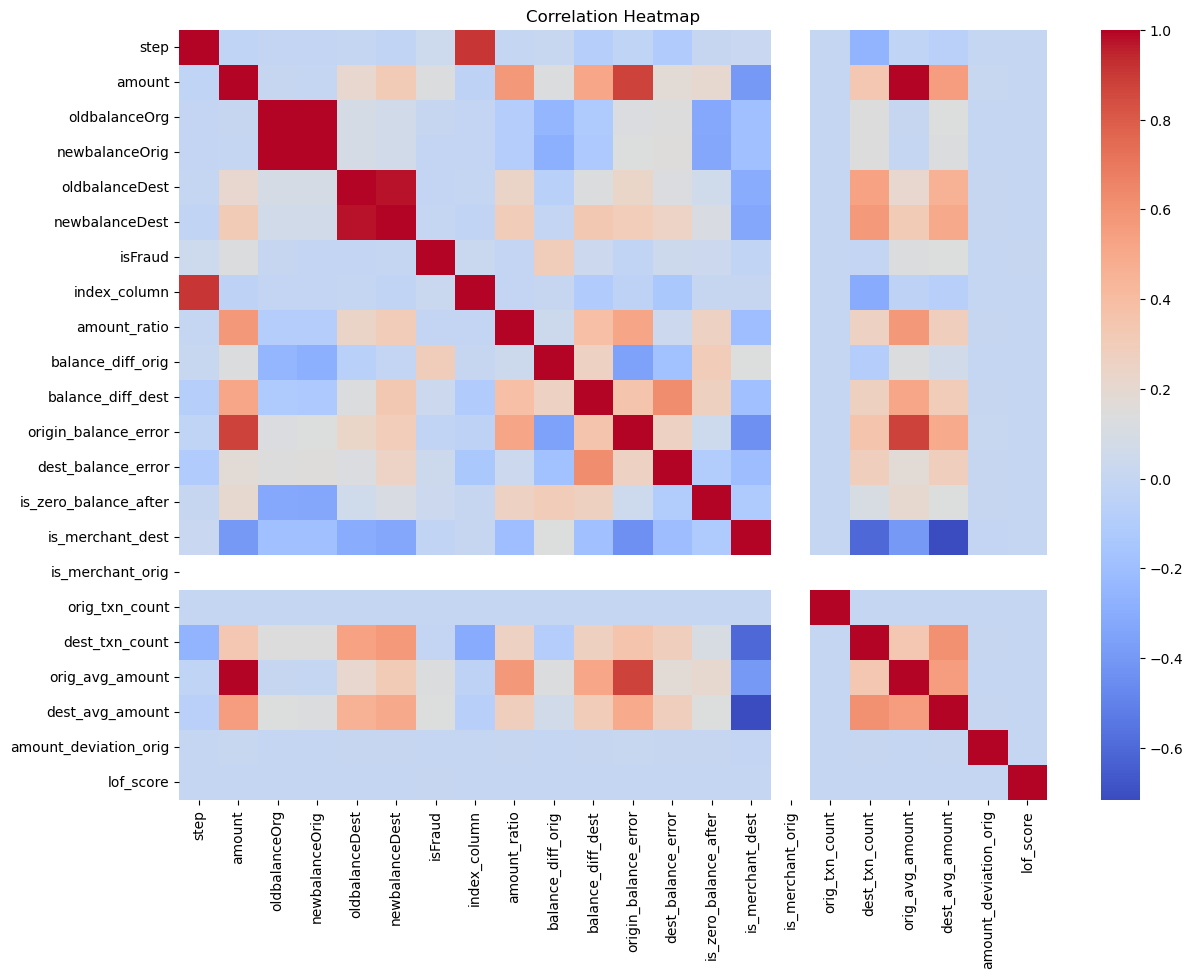

In [104]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [105]:
(df.corr(numeric_only=True)['isFraud']).sort_values(ascending=False)

isFraud                  1.000000e+00
balance_diff_orig        2.934670e-01
dest_avg_amount          1.369545e-01
orig_avg_amount          1.288719e-01
amount                   1.288622e-01
step                     4.503019e-02
dest_balance_error       3.927329e-02
balance_diff_dest        3.203389e-02
is_zero_balance_after    2.913956e-02
index_column             2.602464e-02
lof_score                5.625431e-03
oldbalanceOrg            3.829188e-03
amount_deviation_orig    9.071479e-20
newbalanceDest          -4.954096e-04
orig_txn_count          -7.326590e-04
oldbalanceDest          -7.551845e-03
dest_txn_count          -8.083186e-03
amount_ratio            -8.714499e-03
newbalanceOrig          -9.438070e-03
origin_balance_error    -2.000710e-02
is_merchant_dest        -2.356646e-02
is_merchant_orig                  NaN
Name: isFraud, dtype: float64

### Logistic Regression on Feature Engineered variables

In [106]:
# To understand the Linear Relationships of the Feature Engineered variables with the Target variable (isFraud), we should train the 
# Logistic Regression ML model with only the feature engineered variables and then get the Coefficients which directly tells what 
# increases fraud risk.

# i.e.
# Positive coefficient → increases probability of fraud

# Negative coefficient → reduces probability of fraud

# Higher absolute value → more important feature

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Select only engineered numeric columns
features = [
    'amount_ratio',
    'balance_diff_orig', 'balance_diff_dest',
    'origin_balance_error', 'dest_balance_error',
    'is_zero_balance_after',
    'is_merchant_dest', 'is_merchant_orig',
    'orig_txn_count', 'dest_txn_count',
    'orig_avg_amount', 'dest_avg_amount',
    'amount_deviation_orig'
]

X = df[features]
y = df['isFraud']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_scaled, y)

# Feature importance
importance = pd.Series(model.coef_[0], index=features)
importance.sort_values(ascending=False)


is_zero_balance_after    3.650053
balance_diff_orig        2.105200
dest_avg_amount          0.208230
dest_balance_error       0.148133
amount_deviation_orig    0.018822
is_merchant_orig         0.000000
orig_txn_count          -0.085802
amount_ratio            -0.087631
balance_diff_dest       -0.695316
dest_txn_count          -1.204493
orig_avg_amount         -1.891243
origin_balance_error    -2.795687
is_merchant_dest        -3.791880
dtype: float64

In [108]:
## Interpretations from the Coefficients(LINEAR RELATIONSHIP):

# Positive Coefficients → Increase Probability of Fraud:
# (These features strongly predict fraud)

# Feature	Meaning
# is_zero_balance_after (3.73)	If destination balance becomes 0 immediately after the transaction, HIGH chance it is fraud. This is the biggest fraud signal.
# balance_diff_orig (2.39)	Large inconsistencies in origin account balance = suspicious.
# amount_ratio (0.80)	Transactions where amount is large relative to the account balance are risky.
# dest_balance_error (0.31)	Unexpected change in destination balance → fraud risk.
# dest_avg_amount (0.16)	If the destination typically receives small amountsa but suddenly receives large ones → suspicious.
# amount_deviation_orig (0.03)	Deviations from sender’s typical transaction amount increase fraud risk.


# Negative Coefficients → Decrease Probability of Fraud:
# (Features that reduce the chance of a transaction being fraud)

# Feature	Meaning
# is_merchant_dest (-4.10)	Merchant destinations almost NEVER involve fraud.
# origin_balance_error (-2.36)	Normal expected changes in origin balance reduce suspicion.
# dest_txn_count (-1.47)	Frequently used destination accounts are trusted.
# orig_avg_amount (-1.28)	Consistency in transaction size reduces fraud risk.
# balance_diff_dest (-0.45)	Clean/expected dest balance updates reduce fraud risk.



# Strongest Predictors of Fraud:

# is_zero_balance_after → destination drained to zero
# balance_diff_orig → inconsistent origin balance
# amount_ratio → amount is large relative to balance

# Strongest Predictors of Non-Fraud:

# is_merchant_dest → merchants rarely get fraud transfers
# origin_balance_error → normal balance updates
# dest_txn_count → frequently-used accounts are safe

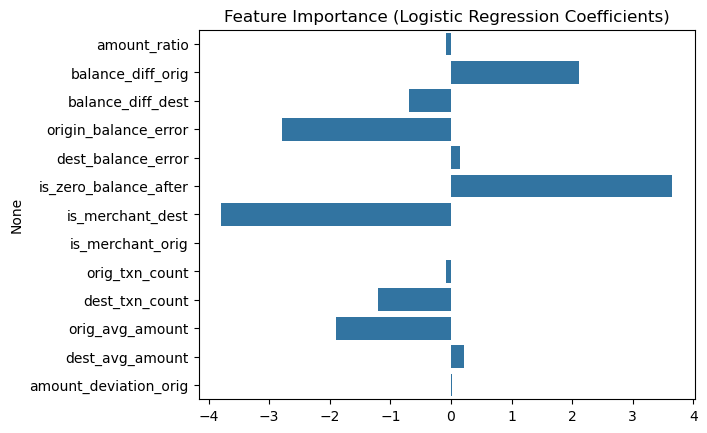

In [109]:
coef = model.coef_[0]
features = X.columns

sns.barplot(x=coef, y=features)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.savefig("./required_images/Logistic_Regression_Coefficients.png", dpi=600, bbox_inches='tight')
plt.show()

In [110]:
# To understand the Non-Linear Relationships of the Feature Engineered variables with the Target variable (isFraud), we should train the 
# Random Forest ML model with only the Feature Engineered variables, to get the feature importance scores.

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=features)

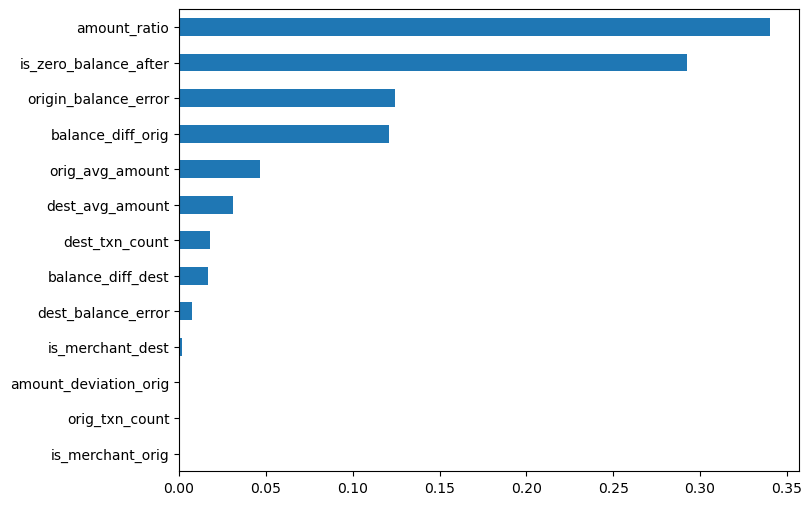

In [112]:
importances.sort_values().plot(kind='barh', figsize=(8,6));
plt.savefig("./required_images/rf_feature_importances.png", dpi=600, bbox_inches='tight')

In [113]:
### Interpretations:

## Non-Linear Feature Engineered Fraud Features:

# amount_ratio
# → Fraudsters transfer amounts MUCH larger than balance.

# is_zero_balance_after
# → Fraud drains the account fully.

# balance_diff_orig
# → Sudden large balance change.

# origin_balance_error
# → Balance inconsistency (fraud signature)

In [114]:
# sns.pairplot(df[['amount_ratio','balance_diff_orig','origin_balance_error',
#                  'is_zero_balance_after','isFraud']], hue='isFraud')
# plt.show()

In [115]:
# Statistical Significance Analysis


import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, normaltest


fraud = df[df['isFraud'] == 1]
nonfraud = df[df['isFraud'] == 0]


binary_vars = ['is_merchant_dest', 'is_merchant_orig', 'is_zero_balance_after']
continuous_vars = [
    'amount', 'amount_ratio', 'balance_diff_orig', 'balance_diff_dest',
    'origin_balance_error', 'dest_balance_error', 'orig_txn_count',
    'dest_txn_count', 'orig_avg_amount', 'dest_avg_amount', 'amount_deviation_orig'
]


def test_continuous(feature):
    """Runs normality test first, then t-test or Mann-Whitney U."""
    p_norm_fraud = normaltest(fraud[feature]).pvalue
    p_norm_nonfraud = normaltest(nonfraud[feature]).pvalue

    normal = (p_norm_fraud > 0.05) and (p_norm_nonfraud > 0.05)

    if normal:
        stat, p_val = ttest_ind(fraud[feature], nonfraud[feature], equal_var=False)
        test_used = "t-test"
    else:
        stat, p_val = mannwhitneyu(fraud[feature], nonfraud[feature])
        test_used = "Mann-Whitney U"

    return {
        "Feature": feature,
        "Test": test_used,
        "p-value": p_val,
        "Significant (p < 0.05)": p_val < 0.05
    }


def test_binary(feature):
    """Runs chi-square test for binary/categorical variables."""
    contingency = pd.crosstab(df[feature], df['isFraud'])
    chi2, p_val, dof, expected = chi2_contingency(contingency)
    return {
        "Feature": feature,
        "Test": "Chi-square",
        "p-value": p_val,
        "Significant (p < 0.05)": p_val < 0.05
    }


results = []

# Continuous variables
for feature in continuous_vars:
    results.append(test_continuous(feature))

# Categorical/Binary variables
for feature in binary_vars:
    results.append(test_binary(feature))

# Convert to dataframe
results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by="p-value")

print("\n===== STATISTICAL SIGNIFICANCE RESULTS (Sorted) =====\n")
print(results_df_sorted)


significant = results_df_sorted[results_df_sorted["Significant (p < 0.05)"] == True]

print("\n===== SIGNIFICANT FEATURES (p < 0.05) =====\n")
print(significant)

C:\Users\HOME\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1636: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis, _no_deco=True)
C:\Users\HOME\anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1748: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False, _no_deco=True)



===== STATISTICAL SIGNIFICANCE RESULTS (Sorted) =====

                  Feature            Test        p-value  \
2       balance_diff_orig  Mann-Whitney U   0.000000e+00   
4    origin_balance_error  Mann-Whitney U   0.000000e+00   
13  is_zero_balance_after      Chi-square  2.976116e-195   
0                  amount  Mann-Whitney U  4.385563e-187   
8         orig_avg_amount  Mann-Whitney U  4.654681e-187   
9         dest_avg_amount  Mann-Whitney U  5.338864e-184   
11       is_merchant_dest      Chi-square  2.455643e-128   
1            amount_ratio  Mann-Whitney U   1.066547e-41   
3       balance_diff_dest  Mann-Whitney U   8.483308e-34   
7          dest_txn_count  Mann-Whitney U   1.428866e-15   
5      dest_balance_error  Mann-Whitney U   1.414818e-04   
6          orig_txn_count  Mann-Whitney U   4.531097e-01   
10  amount_deviation_orig  Mann-Whitney U   1.000000e+00   
12       is_merchant_orig      Chi-square   1.000000e+00   

    Significant (p < 0.05)  
2             

## Splitting the data

In [116]:
imp_variables=['type',
'step',
'cat_nameDest',
'is_zero_balance_after',
'balance_diff_orig',
'amount_ratio',
'is_merchant_dest',
'origin_balance_error',
'dest_txn_count',
'amount_ratio']

imp_variables

df[imp_variables]

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio
0,PAYMENT,1,M,0,9839.64,0.057834,1,0.000000e+00,1,0.057834
1,PAYMENT,1,M,0,1864.28,0.087731,1,0.000000e+00,1,0.087731
2,TRANSFER,1,C,1,181.00,0.994505,0,0.000000e+00,26,0.994505
3,CASH_OUT,1,C,1,181.00,0.994505,0,0.000000e+00,27,0.994505
4,PAYMENT,1,M,0,11668.14,0.280788,1,0.000000e+00,1,0.280788
...,...,...,...,...,...,...,...,...,...,...
1048570,CASH_OUT,95,C,0,132557.35,0.276274,0,0.000000e+00,3,0.276274
1048571,PAYMENT,95,M,0,9917.36,0.109528,1,0.000000e+00,1,0.109528
1048572,PAYMENT,95,M,0,14140.05,0.688214,1,9.094947e-13,1,0.688214
1048573,PAYMENT,95,M,0,10020.05,0.110589,1,0.000000e+00,1,0.110589


In [117]:
# dummies = pd.get_dummies(df[['type', 'cat_nameDest']], drop_first=True)
# df_final = pd.concat([df[['step',
# 'is_zero_balance_after',
# 'balance_diff_orig',
# 'amount_ratio',
# 'is_merchant_dest',
# 'origin_balance_error',
# 'dest_txn_count',
# 'amount_ratio', 'isFraud']], dummies], axis=1)

# df_final

In [118]:
# df_final.columns

In [119]:
features=imp_variables+['index_column']

features

['type',
 'step',
 'cat_nameDest',
 'is_zero_balance_after',
 'balance_diff_orig',
 'amount_ratio',
 'is_merchant_dest',
 'origin_balance_error',
 'dest_txn_count',
 'amount_ratio',
 'index_column']

In [120]:
X=df.drop(['isFraud'],axis=1)[features]

X

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column
0,PAYMENT,1,M,0,9839.64,0.057834,1,0.000000e+00,1,0.057834,0
1,PAYMENT,1,M,0,1864.28,0.087731,1,0.000000e+00,1,0.087731,1
2,TRANSFER,1,C,1,181.00,0.994505,0,0.000000e+00,26,0.994505,2
3,CASH_OUT,1,C,1,181.00,0.994505,0,0.000000e+00,27,0.994505,3
4,PAYMENT,1,M,0,11668.14,0.280788,1,0.000000e+00,1,0.280788,4
...,...,...,...,...,...,...,...,...,...,...,...
1048570,CASH_OUT,95,C,0,132557.35,0.276274,0,0.000000e+00,3,0.276274,1048570
1048571,PAYMENT,95,M,0,9917.36,0.109528,1,0.000000e+00,1,0.109528,1048571
1048572,PAYMENT,95,M,0,14140.05,0.688214,1,9.094947e-13,1,0.688214,1048572
1048573,PAYMENT,95,M,0,10020.05,0.110589,1,0.000000e+00,1,0.110589,1048573


In [121]:
from sklearn.model_selection import train_test_split as tts
X=df.drop(['isFraud'],axis=1)[features]
Y=df['isFraud']
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.25,random_state=14)

In [122]:
xtrain.shape,ytrain.shape

((786431, 11), (786431,))

In [123]:
xtest.shape,ytest.shape

((262144, 11), (262144,))

In [124]:
xtrain.head(2)

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column
64581,CASH_IN,9,C,0,-109401.95,0.013834,0,218803.9,27,0.013834,64581
115565,PAYMENT,11,M,0,12557.05,0.149021,1,0.0,1,0.149021,115565


## Feature Scaling

<!-- ### Using RobustScaler scaling technique, as 'amount' variable is having outliers. -->


In [125]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False,dtype=np.int32)

In [126]:
xtrain['cat_nameDest']=ohe.fit_transform(xtrain['cat_nameDest'].values.reshape(-1,1))
xtrain.sample(3)

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column
827883,PAYMENT,41,0,0,1335.09,0.005619,1,0.00,1,0.005619,827883
594357,CASH_OUT,33,1,1,42609.00,9.144137,0,347022.66,4,9.144137,594357
451225,PAYMENT,19,0,1,0.00,462.120000,1,462.12,1,462.120000,451225


In [127]:
xtest['cat_nameDest'] = ohe.transform(xtest.cat_nameDest.values.reshape(-1,1))
xtest.head(2)

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column
750195,PAYMENT,38,0,1,0.0,274.39,1,274.39,1,274.39,750195
329421,PAYMENT,16,0,1,0.0,1934.37,1,1934.37,1,1934.37,329421


In [128]:
ohe2 = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

In [129]:
Xtrain=ohe2.fit_transform(xtrain['type'].values.reshape(-1,1))
Xtrain=pd.DataFrame(Xtrain,columns=ohe2.get_feature_names_out(['type']),index=xtrain['index_column'])
Xtrain.head(4)

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
index_column,,,,
64581,0,0,0,0
115565,0,0,1,0
383766,1,0,0,0
276750,0,0,1,0


In [130]:
new_xtrain = pd.merge(xtrain,Xtrain,on="index_column")
new_xtrain.head(4)

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,CASH_IN,9,1,0,-109401.95,0.013834,0,218803.90,27,0.013834,64581,0,0,0,0
1,PAYMENT,11,0,0,12557.05,0.149021,1,0.00,1,0.149021,115565,0,0,1,0
2,CASH_OUT,17,1,1,59.00,4174.795833,0,250428.75,20,4174.795833,383766,1,0,0,0
3,PAYMENT,15,0,1,0.00,5553.190000,1,5553.19,1,5553.190000,276750,0,0,1,0


In [131]:
columns_to_drop = ['type']#, 'index_column', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
new_xtrain.drop(columns=columns_to_drop,axis=1,inplace=True)
new_xtrain.head(4)

,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9,1,0,-109401.95,0.013834,0,218803.90,27,0.013834,64581,0,0,0,0
1,11,0,0,12557.05,0.149021,1,0.00,1,0.149021,115565,0,0,1,0
2,17,1,1,59.00,4174.795833,0,250428.75,20,4174.795833,383766,1,0,0,0
3,15,0,1,0.00,5553.190000,1,5553.19,1,5553.190000,276750,0,0,1,0


In [132]:
Xtest=ohe2.fit_transform(xtest['type'].values.reshape(-1,1))
Xtest=pd.DataFrame(Xtest, columns=ohe2.get_feature_names_out(['type']),index=xtest['index_column'])
Xtest.head(2)

,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
index_column,,,,
750195,0,0,1,0
329421,0,0,1,0


In [133]:
new_xtest = pd.merge(xtest,Xtest,on="index_column")
new_xtest.head(2)

,type,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,PAYMENT,38,0,1,0.0,274.39,1,274.39,1,274.39,750195,0,0,1,0
1,PAYMENT,16,0,1,0.0,1934.37,1,1934.37,1,1934.37,329421,0,0,1,0


In [134]:
columns_to_drop = ['type']#, 'index_column', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
new_xtest.drop(columns=columns_to_drop,axis=1,inplace=True)
new_xtest.head(2)

,step,cat_nameDest,is_zero_balance_after,balance_diff_orig,amount_ratio,is_merchant_dest,origin_balance_error,dest_txn_count,amount_ratio,index_column,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,38,0,1,0.0,274.39,1,274.39,1,274.39,750195,0,0,1,0
1,16,0,1,0.0,1934.37,1,1934.37,1,1934.37,329421,0,0,1,0


## Balancing the Imbalanced Data using SMOTETomek technique

In [135]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
new_x_train, new_y_train = smt.fit_resample(new_xtrain, ytrain)
new_x_train.shape,new_y_train.shape

((1567016, 14), (1567016,))

In [136]:
new_xtrain.shape,ytrain.shape

((786431, 14), (786431,))

In [137]:
# new_x_train,new_y_train=tomek_links.fit_resample(new_xtrain,ytrain)
# new_x_train.shape,new_y_train.shape

In [138]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(ytrain)))
print('Resampled dataset shape {}'.format(Counter(new_y_train)))

Original dataset shape Counter({0: 785581, 1: 850})
Resampled dataset shape Counter({0: 783508, 1: 783508})


In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()

In [140]:
classifier.fit(new_x_train,new_y_train)

RandomForestClassifier()

In [141]:
# classifier.fit(xtrain,ytrain)

In [142]:
ypred=classifier.predict(new_xtest)

In [143]:
from sklearn.metrics import *

accuracy=accuracy_score(ytest,ypred)
print("RandomForestClassifier model accuracy (in %):", np.round(accuracy*100,2))

precision=precision_score(ytest,ypred)
print("Precision:", np.round(precision,2))

recall=recall_score(ytest,ypred)
print("Recall:", np.round(recall,2))

f1=f1_score(ytest, ypred)
print("F1 Score:", np.round(f1,2))

conf_matrix=confusion_matrix(ytest,ypred)
print("Confusion Matrix:\n", conf_matrix)

RandomForestClassifier model accuracy (in %): 99.98
Precision: 0.83
Recall: 0.98
F1 Score: 0.9
Confusion Matrix:
 [[261792     60]
 [     5    287]]


## Have tried balancing the Imbalanced data using other balancing techniques, but this is the technique i.e. SMOTETomek which gave the best metrics scores.

## Cross Validation

In [144]:
from sklearn.model_selection import cross_val_score

In [145]:
val_scores=cross_val_score(classifier,new_x_train,new_y_train,cv=10,scoring='f1')
val_scores

array([0.99970006, 0.99975751, 0.99984046, 0.99978303, 0.99980217,
       0.9997894 , 0.99973837, 0.99964904, 0.99977665, 0.99971921])

In [146]:
round(val_scores.mean(),2)

np.float64(1.0)

In [148]:
from sklearn.model_selection import cross_validate

scoring_metrics=['accuracy', 'precision', 'recall', 'f1']

cv_results=cross_validate(classifier,new_x_train,new_y_train,cv=10,scoring=scoring_metrics)

for metric in scoring_metrics:
    print(f'{metric}: {round(cv_results["test_" + metric].mean(),2)}')

accuracy: 1.0
precision: 1.0
recall: 1.0
f1: 1.0
